In [15]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
from scipy.signal import savgol_filter
from scipy.ndimage.filters import gaussian_filter
# rcParams.update({'font.size': 12})
# import matplotlib as mpl
# label_size = 20
# mpl.rcParams['xtick.labelsize'] = label_size 

/home/xy4cm/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


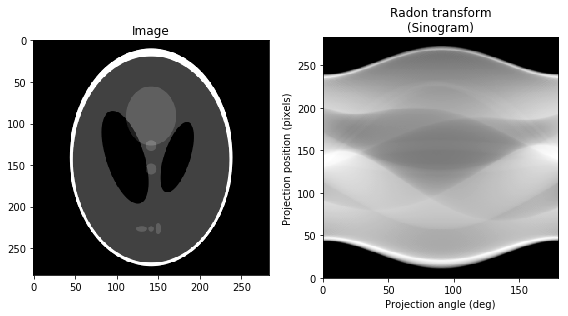

In [16]:
from skimage.io import imread
# from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = imread('SheppLogan_Phantom.png')
image = rescale(image, scale=0.5, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Image")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

In [17]:
I1=sinogram[:, 0]
I1 = gaussian_filter(I1, sigma=5.0)
# I1 = I1[40:-40]
# I1 = np.pad(I1, [50, 50], mode='constant')

In [18]:
N=len(I1)
x=np.arange(N)
x0 = np.linspace(0, 1, N)
#I0= np.ones(N)
sig = 50
I0 = np.exp(-np.power(x - N/2, 2.) / (2 * np.power(sig, 2.)))


print(N)

283


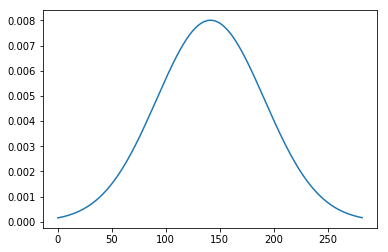

In [19]:
epsilon = 1e-3
I0 = abs(I0) + epsilon
I0 = I0/I0.sum()

plt.plot(x,I0)
plt.show()
I1 = I1 + 50
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()

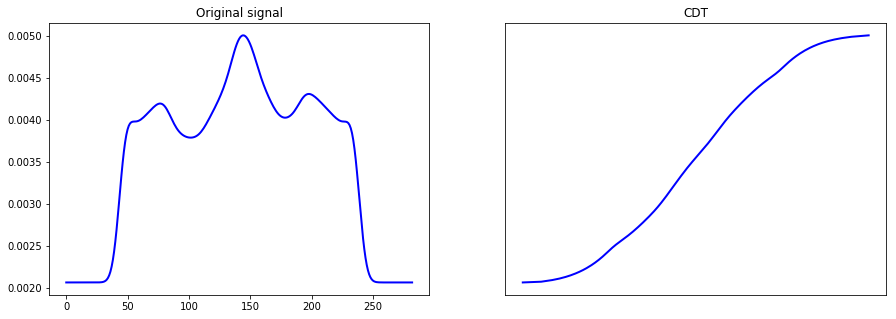

In [20]:
from optrans.continuous.cdt import CDT

# Create a CDT object
cdt = CDT()

# Compute the forward transform
I1_hat, f1_hat, xtilde = cdt.forward(x0, I0, x, I1, rm_edge=False)
# f1_hat = f1_hat[25:-25]

# Plot I1 and I1_hat
# fontSize=14
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15,5))
ax[0].plot(x,I1, 'b-',linewidth=2)
ax[0].set_title('Original signal')
#ax[0].set_xticks([])
#ax[0].set_yticks([])

ax[1].plot(f1_hat, 'b-',linewidth=2)
ax[1].set_title('CDT')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

# Calculate DCT coefficients

Using DCT of image:

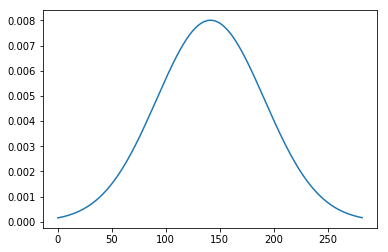

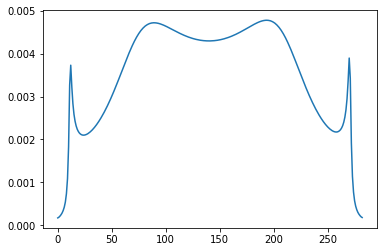

In [29]:
from scipy.fftpack import dct, idct, dst, idst
f1_hat_recon = None

# def dct_recons(I1, N):
#     I_dct = dct(I1)

#     I_dct_ = I_dct.copy()
#     I_dct.sort()

#     lowVal = I_dct[-1*N]
#     lowVal_flags = I_dct_ < lowVal
#     I_dct_[lowVal_flags] = 0

#     I_recon = idct(I_dct_)
#     return I_recon/I_recon.sum()

def dct_recons(x, num_coefficents):
    N = len(x)
    t = np.linspace(0, 1, N)
    y = dct(x, norm='ortho')
    th = np.sort(np.abs(y))[::-1][num_coefficents-1]
    y[np.abs(y)<th] = 0
#     window = np.zeros(N)
#     window[:num_coefficents] = 1
    yr = idct(y, norm='ortho')
    return yr


def cdt_recons(x0, f1_hat, N):
    I1_hat = f1_hat - x0
   # plt.plot(I1_hat)
   # plt.show()
#     I1_hat_dct = dct(I1_hat)
#     plt.plot(I1_hat)
#     plt.show()
#     size = 25
#     I1_hat_dct = I1_hat_dct[size:-size]
    
#     I1_hat_dct = np.pad(I1_hat_dct, [size, size], mode='constant')

#     I1_hat_dct_ = I1_hat_dct.copy()
#     I1_hat_dct.sort()

#     lowVal = I1_hat_dct[-1*N]
#     lowVal_flags = I1_hat_dct_ < lowVal
#     I1_hat_dct_[lowVal_flags] = 0
    
#     #global f1_hat_recon
#     I1_hat_recon = idct(I1_hat_dct_)
    I1_hat_recon = dct_recons(I1_hat, N)
#     plt.plot(I1_hat_recon)

   
    f1_hat_recon = x0 + I1_hat_recon
    #plt.plot(f1_hat_recon)
    #I1_hat_recon = I1_hat_recon*abs(I1_hat.min())/abs(I1_hat_recon.min())
    f1_hat_recon = (f1_hat_recon - f1_hat_recon.min())/(f1_hat_recon.max()- f1_hat_recon.min())

    f1_hat_recon = f1_hat_recon*f1_hat.max()
#     plt.plot(f1_hat_recon)
#     plt.show()

#     ## CUT
#     N = len(f1_hat_recon)
#     size = 25
#     f1_hat_recon = f1_hat_recon[size:-size]
#     f1_hat_recon = np.interp(np.linspace(0, 1, N), np.linspace(0, 1, N-50), f1_hat_recon)
    
#     plt.plot(f1_hat_recon)
    
#     f1_hat_recon = np.pad(f1_hat_recon, [size, size], mode='wrap')
#     plt.plot(f1_hat_recon)

    I1_recon = cdt.inverse(f1_hat_recon, I0, x)
    
    plt.plot(x,I0)
    plt.show()
    
    plt.plot(x,I1_recon)
    plt.show()


    return I1_hat, I1_hat_recon, f1_hat_recon, I1_recon


#nth_max = len(I1)
nth_max = 4  # select number of largest DCT coefficients to use
I_recon = dct_recons(I1, nth_max)
I1_hat, I1_hat_recon, f1_hat_recon, I1_recon = cdt_recons(x, f1_hat, nth_max)

Using DCT of CDT:

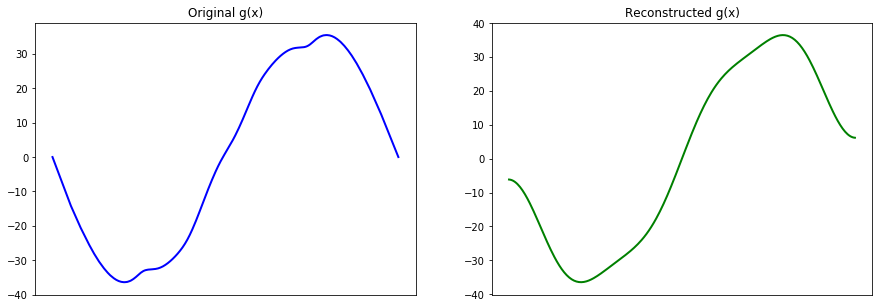

In [30]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15,5))
ax[0].plot(x,I1_hat, 'b-',linewidth=2)
ax[0].set_title('Original g(x)')
ax[0].set_xticks([])
#ax[0].set_yticks([])

ax[1].plot(I1_hat_recon, 'g-',linewidth=2)
ax[1].set_title('Reconstructed g(x)')
ax[1].set_xticks([])
#ax[1].set_yticks([])

plt.show()

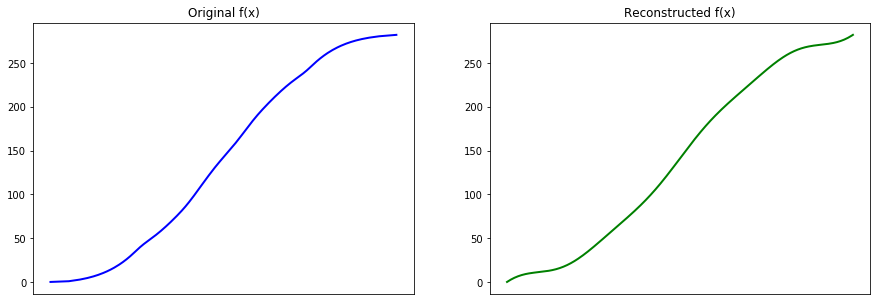

In [31]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15,5))
ax[0].plot(x,f1_hat, 'b-',linewidth=2)
ax[0].set_title('Original f(x)')
ax[0].set_xticks([])
#ax[0].set_yticks([])

ax[1].plot(f1_hat_recon, 'g-',linewidth=2)
ax[1].set_title('Reconstructed f(x)')
ax[1].set_xticks([])
#ax[1].set_yticks([])

plt.show()

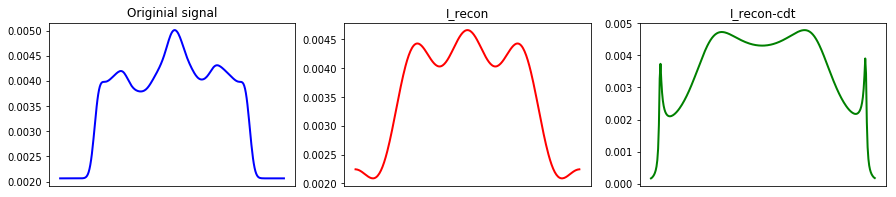

In [32]:

# Plot I_recon and I_hat_recon
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,3))

ax[0].plot(x,I1, 'b-',linewidth=2)
ax[0].set_title('Originial signal')
ax[0].set_xticks([])
#ax[0].set_yticks([])

ax[1].plot(x,I_recon, 'r-',linewidth=2)
ax[1].set_title('I_recon')
ax[1].set_xticks([])
#ax[1].set_yticks([])

ax[2].plot(I1_recon, 'g-',linewidth=2)
ax[2].set_title('I_recon-cdt')
ax[2].set_xticks([])
#ax[2].set_yticks([])

plt.savefig('out.png', dpi=500)
plt.show()

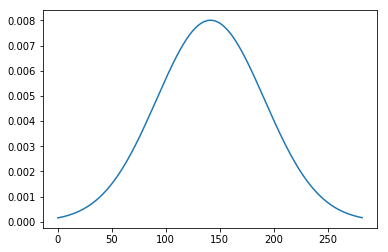

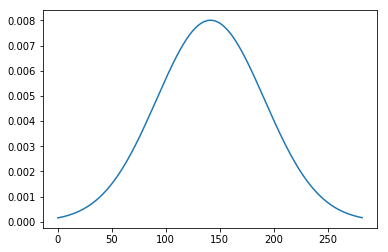

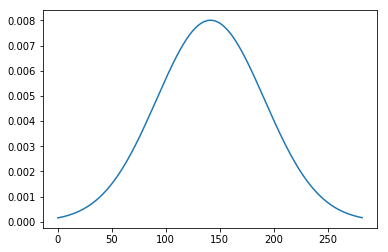

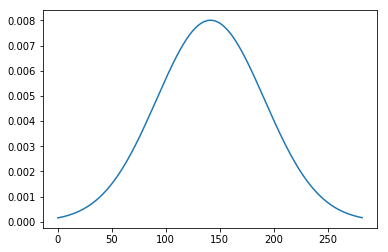

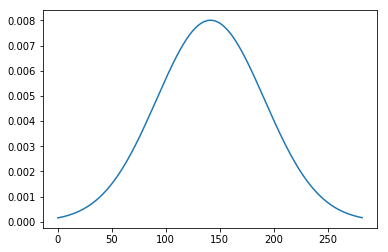

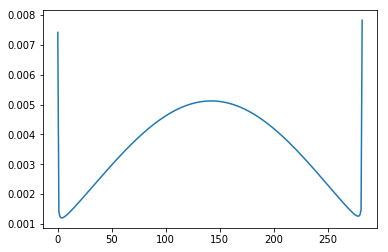

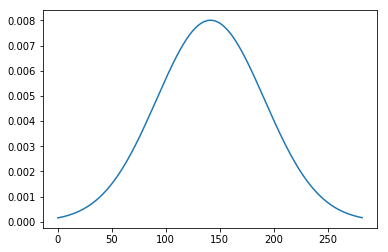

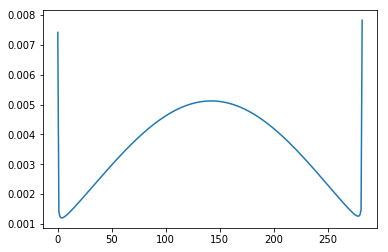

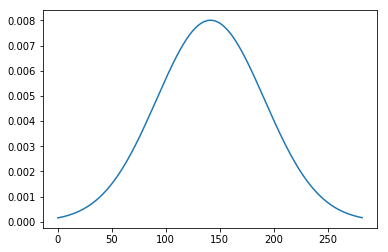

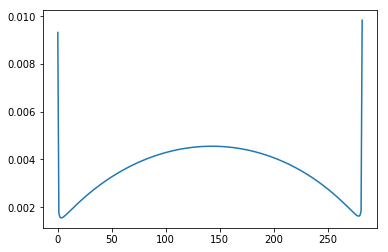

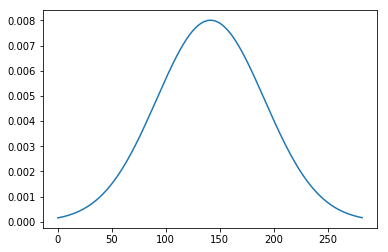

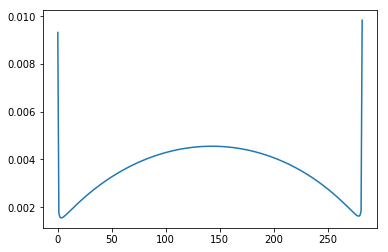

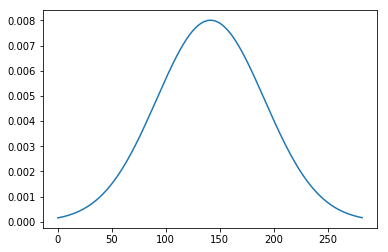

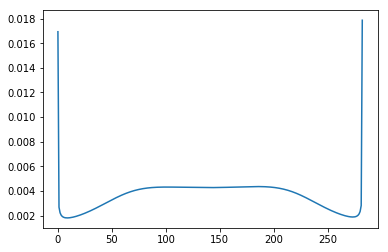

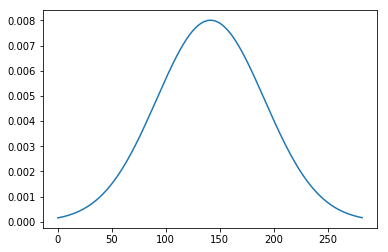

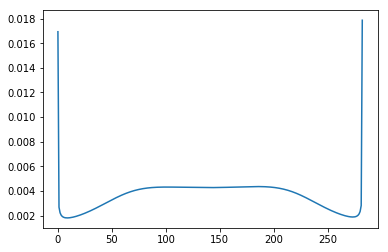

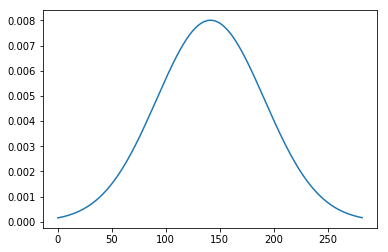

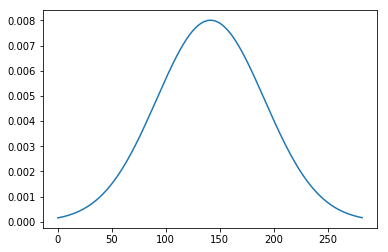

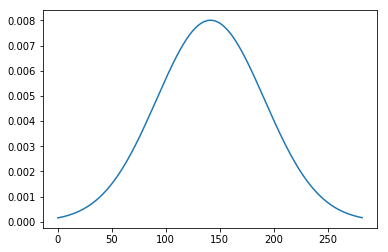

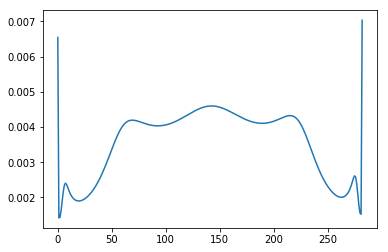

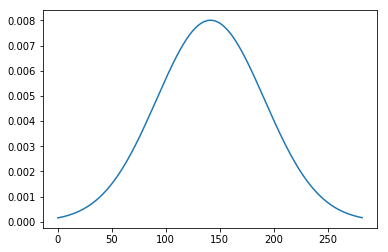

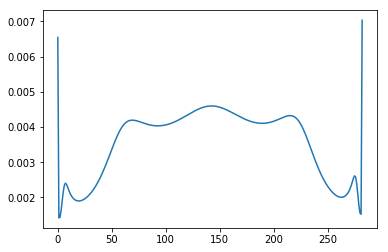

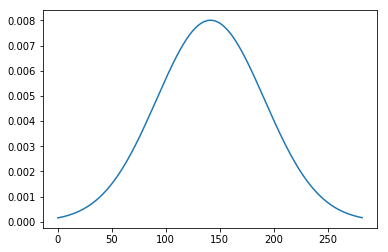

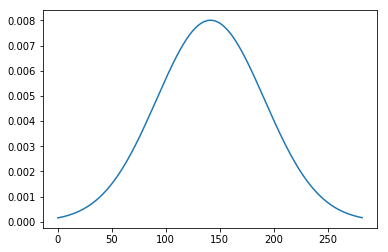

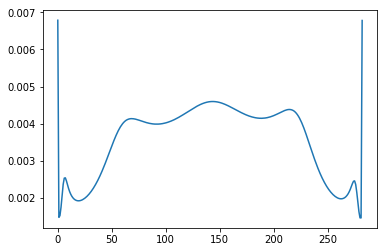

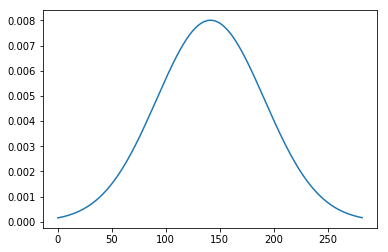

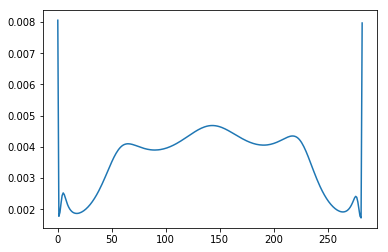

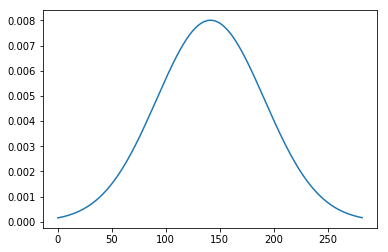

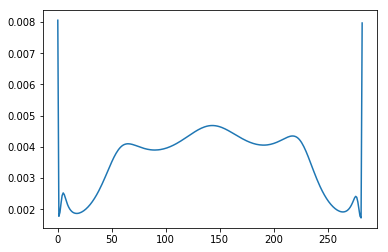

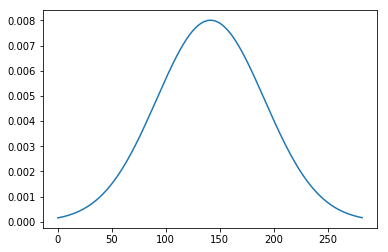

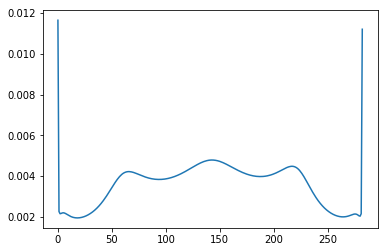

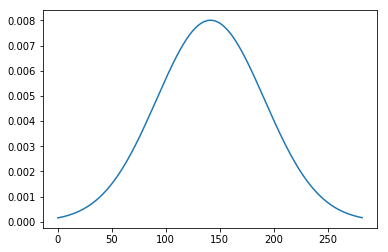

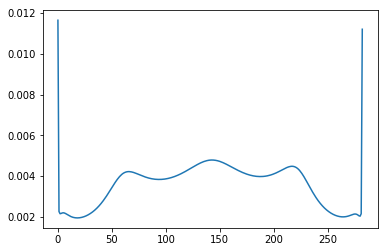

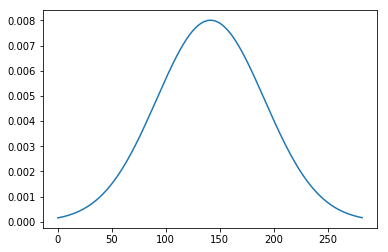

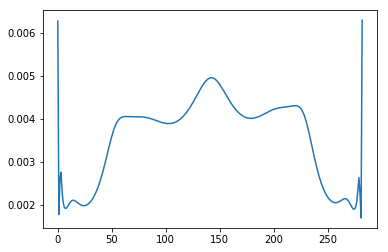

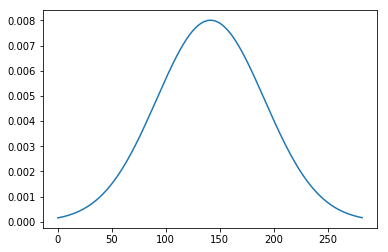

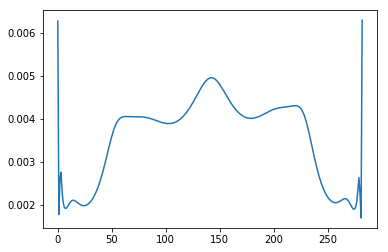

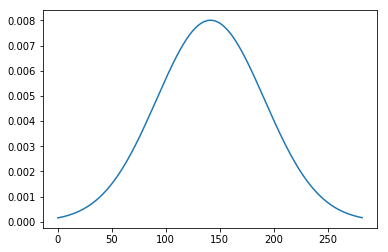

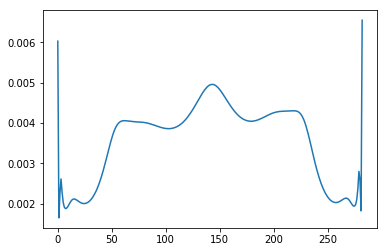

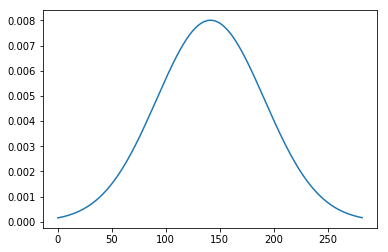

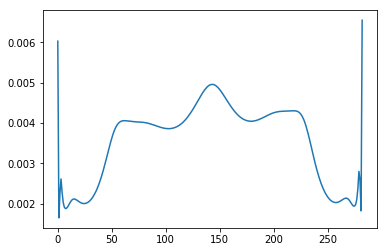

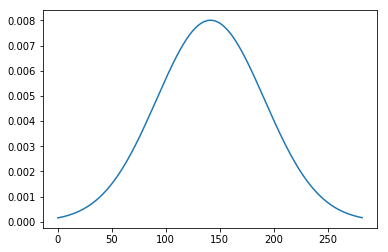

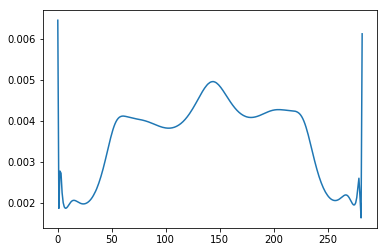

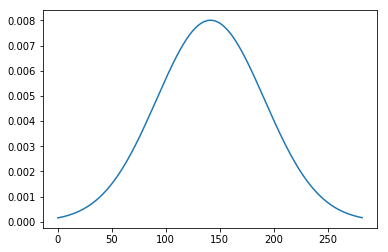

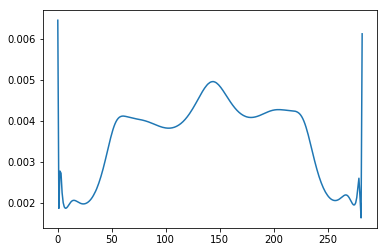

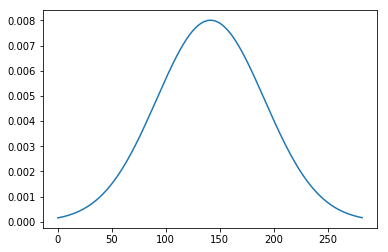

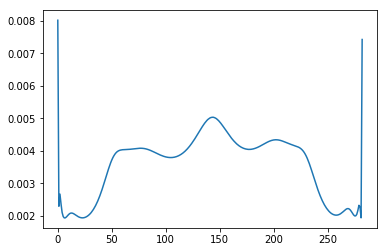

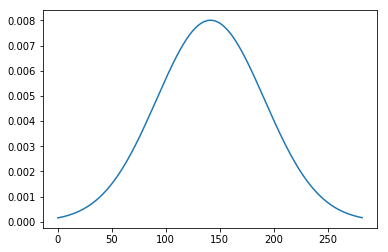

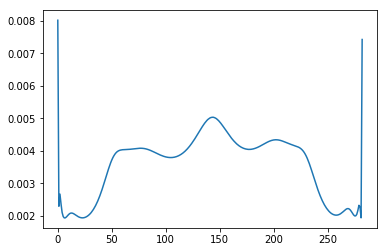

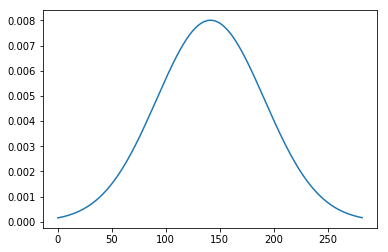

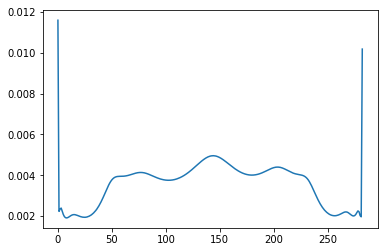

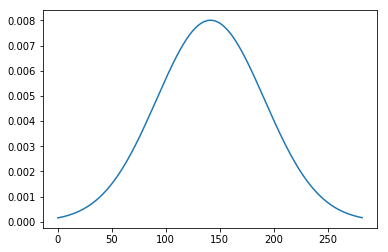

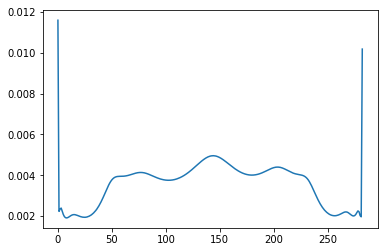

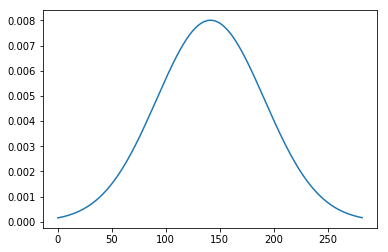

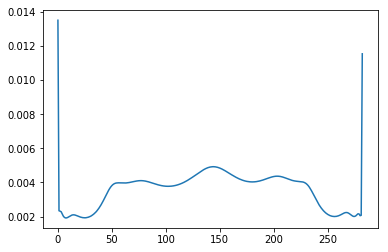

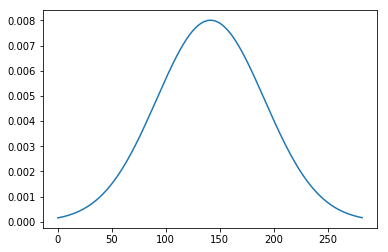

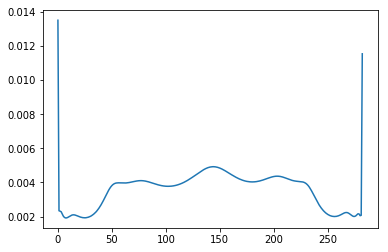

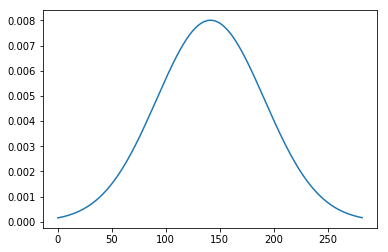

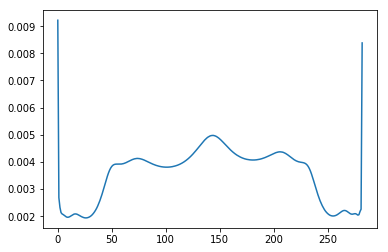

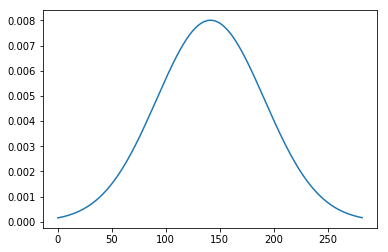

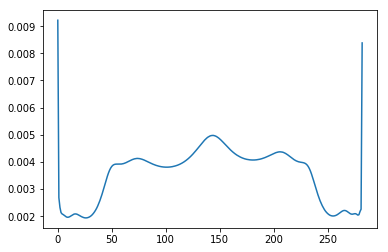

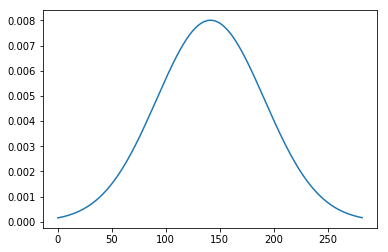

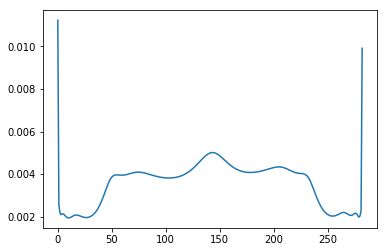

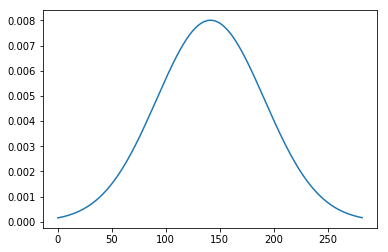

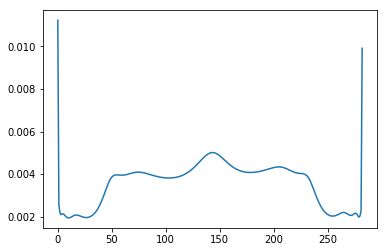

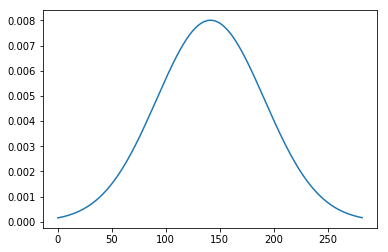

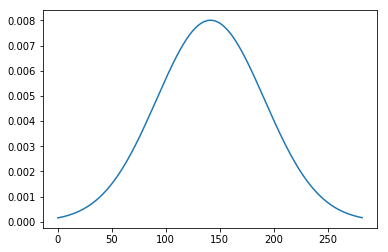

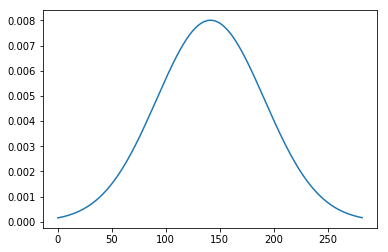

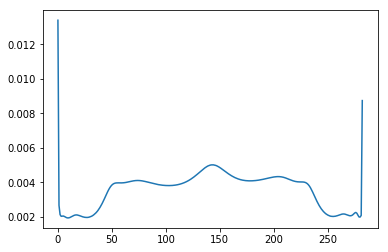

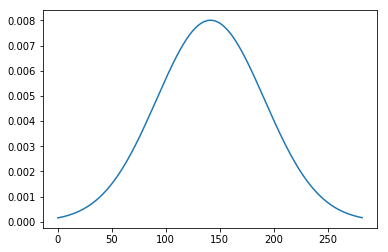

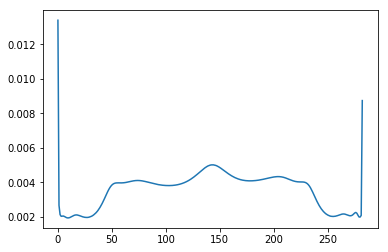

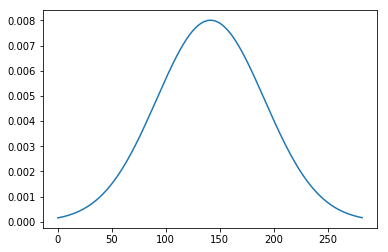

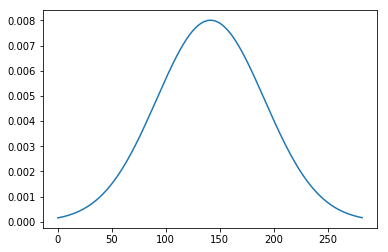

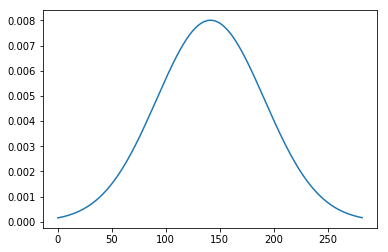

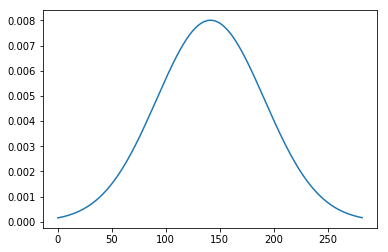

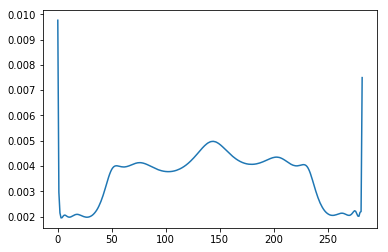

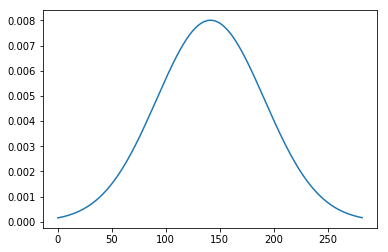

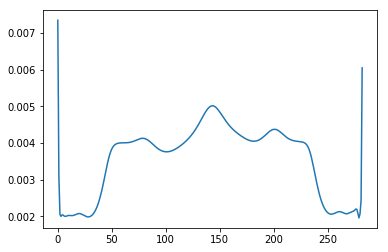

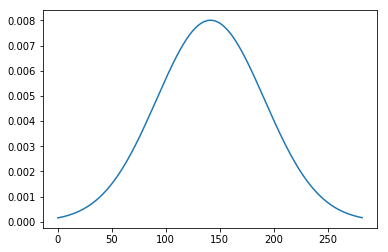

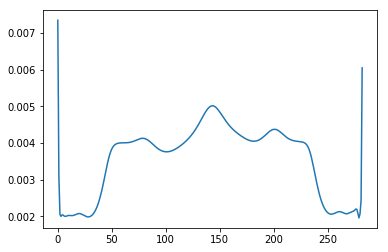

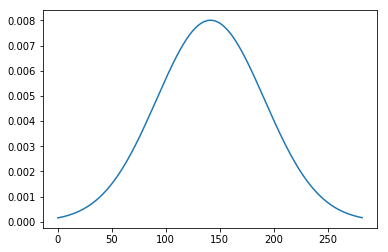

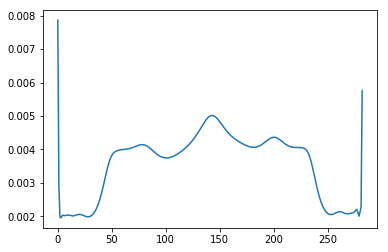

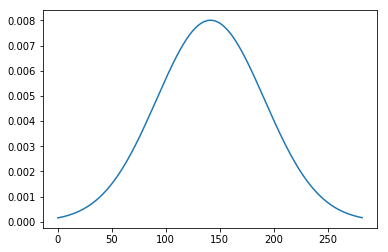

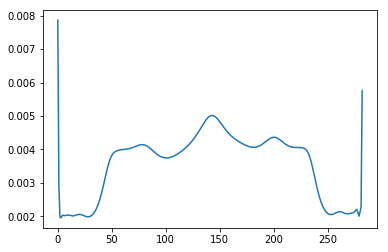

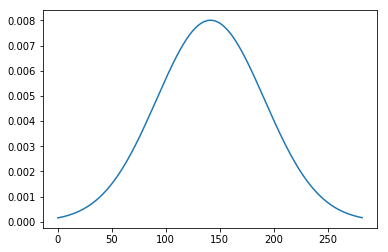

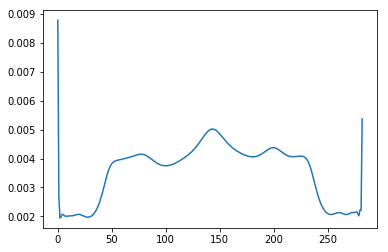

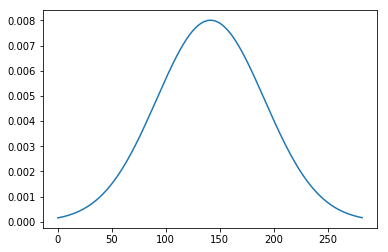

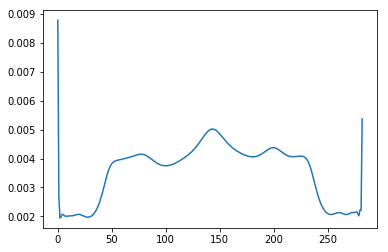

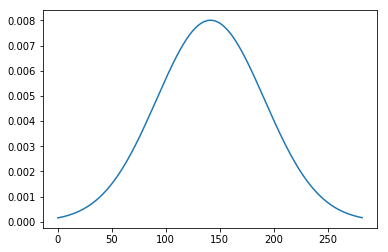

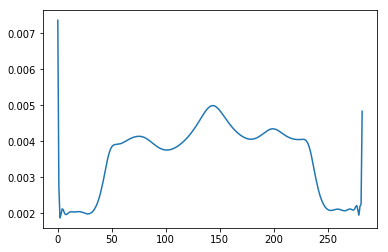

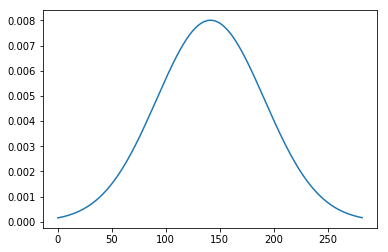

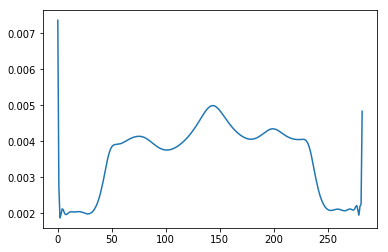

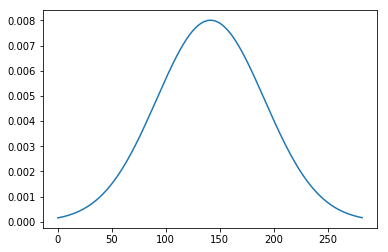

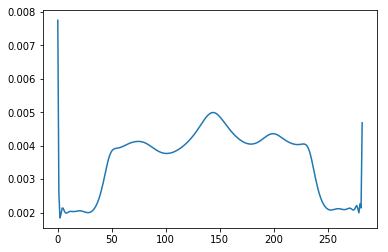

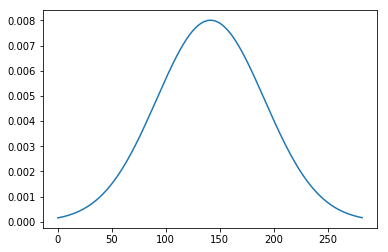

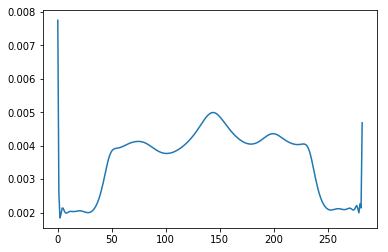

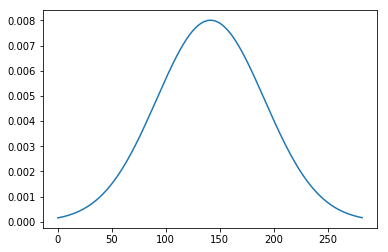

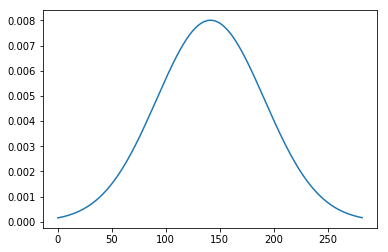

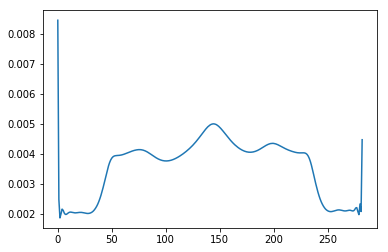

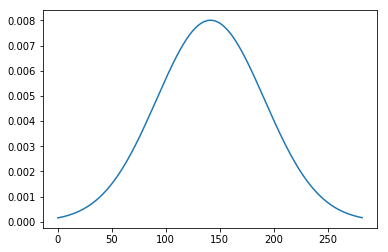

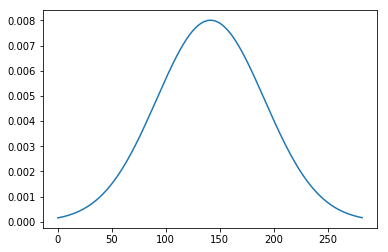

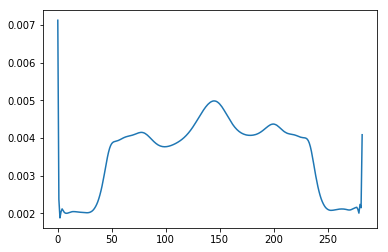

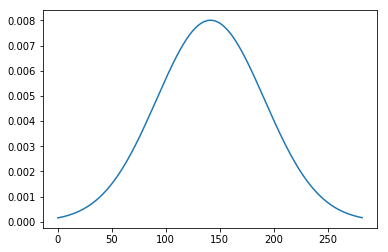

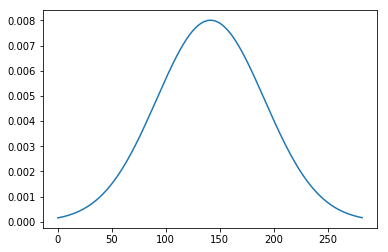

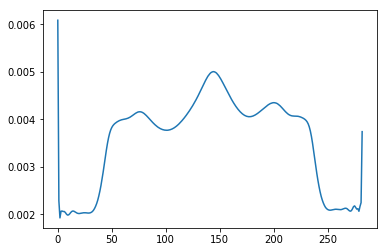

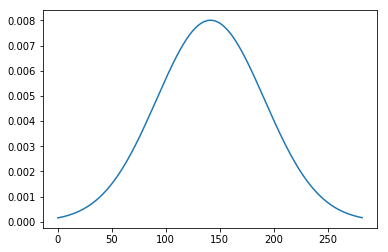

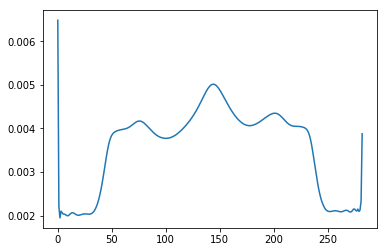

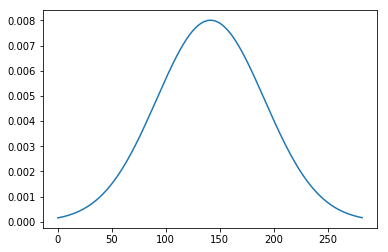

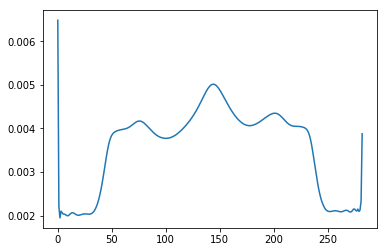

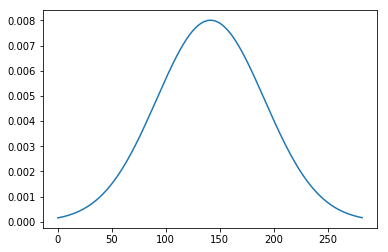

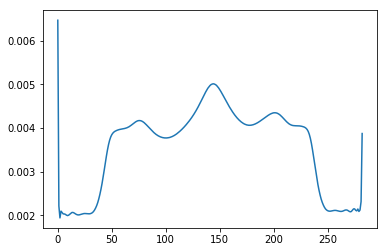

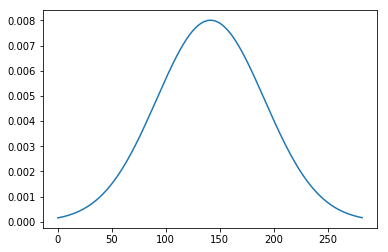

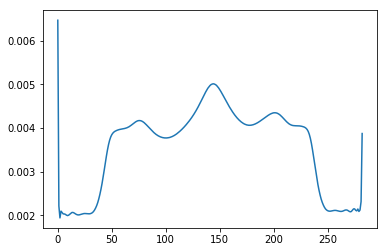

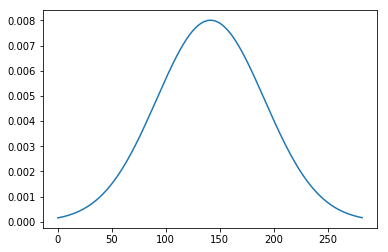

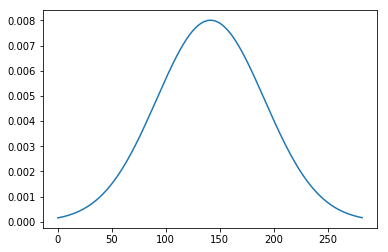

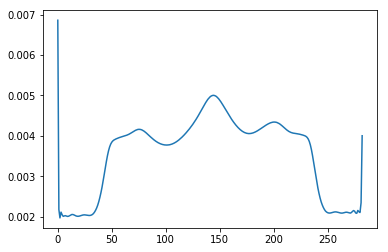

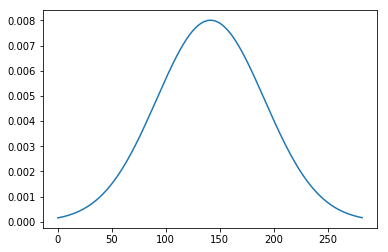

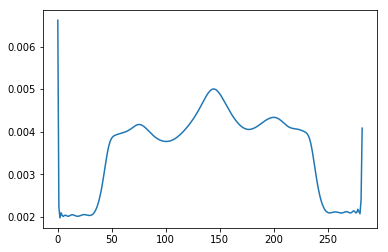

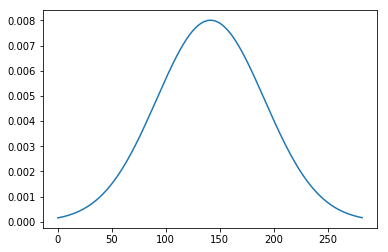

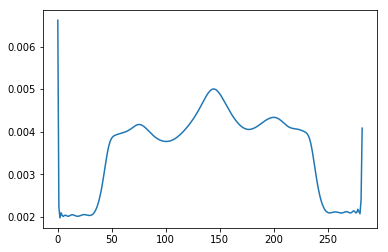

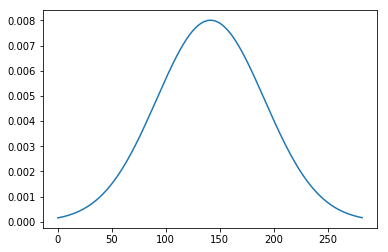

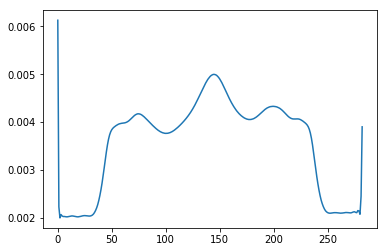

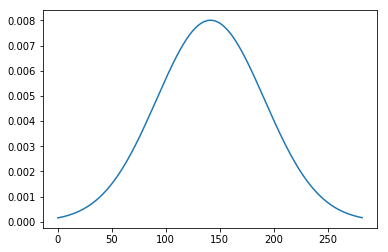

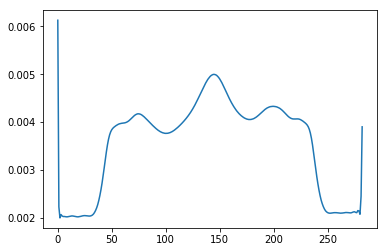

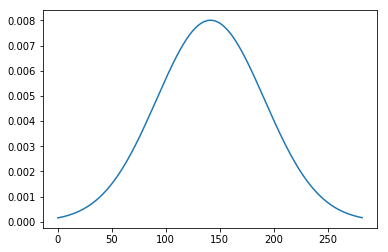

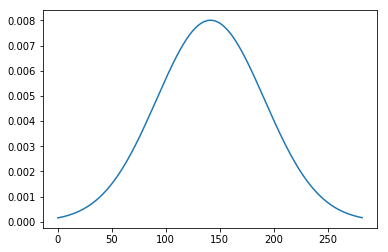

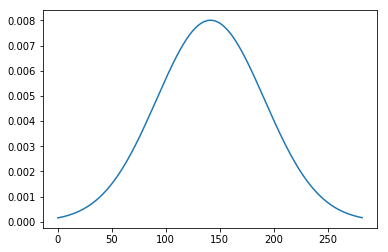

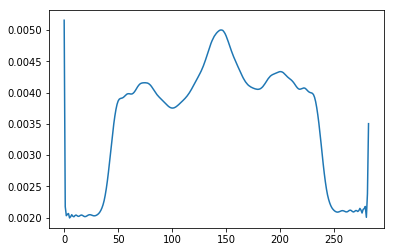

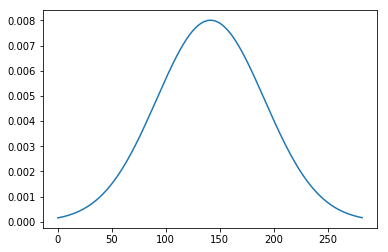

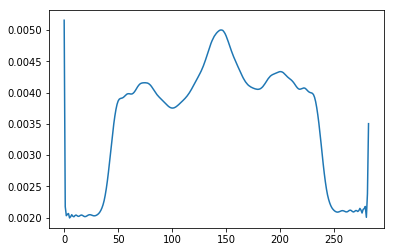

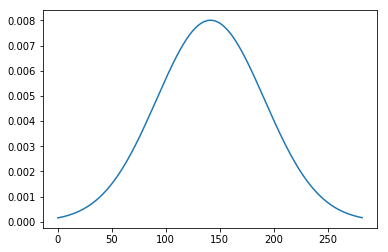

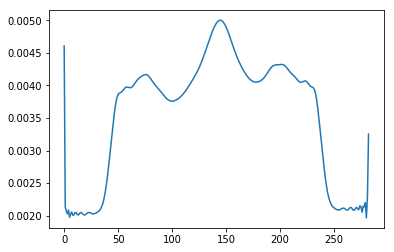

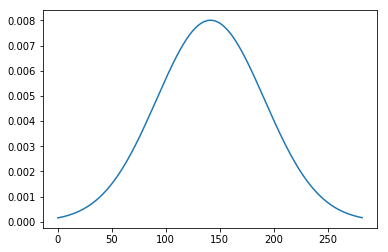

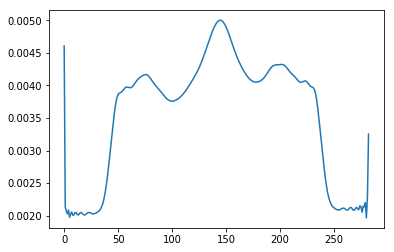

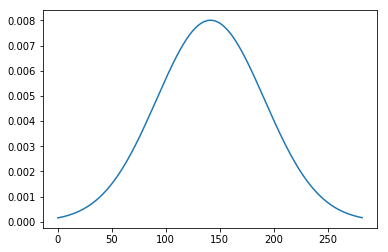

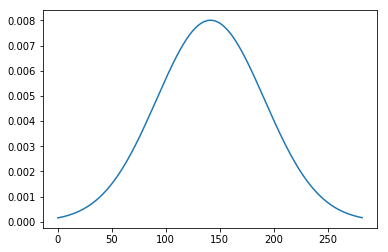

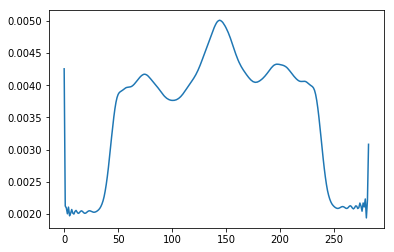

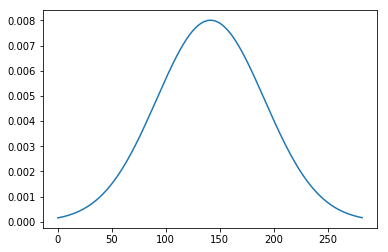

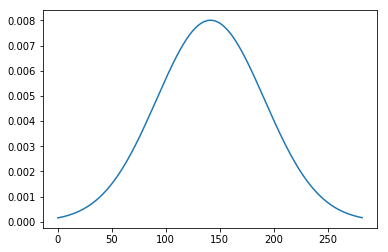

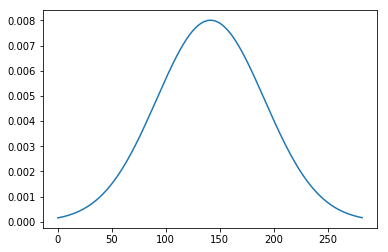

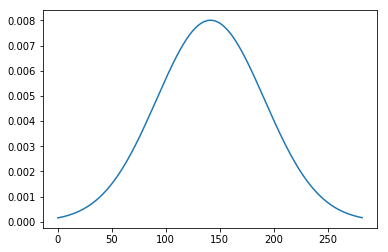

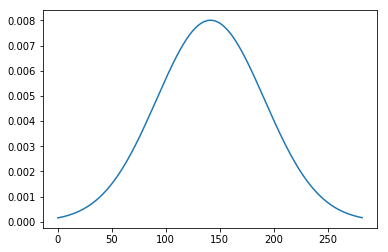

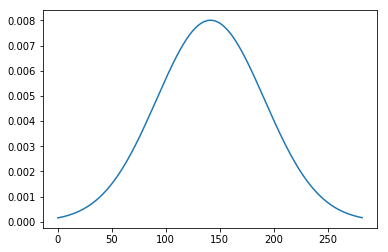

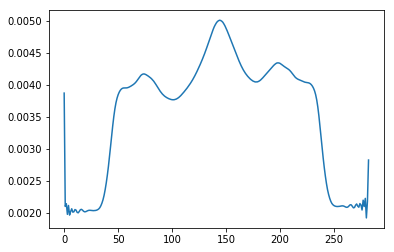

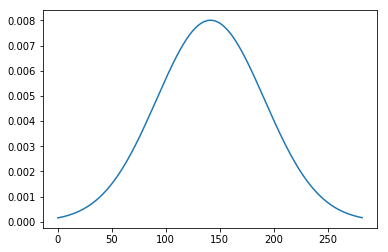

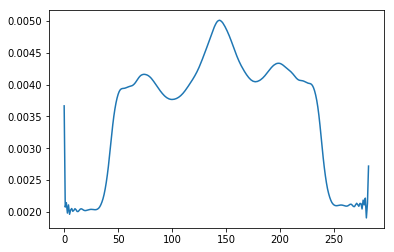

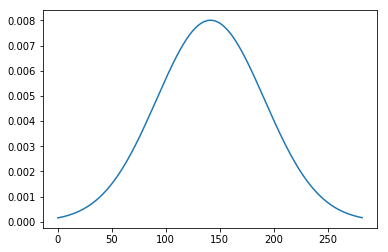

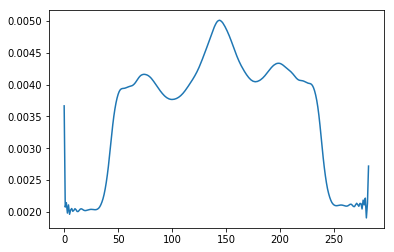

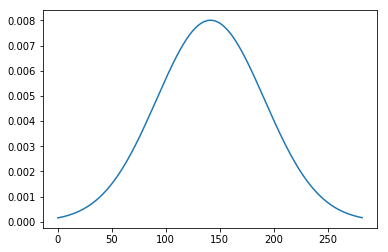

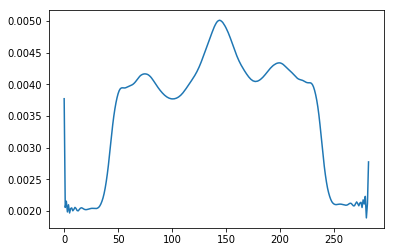

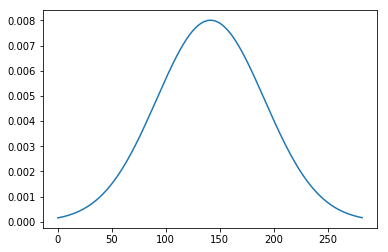

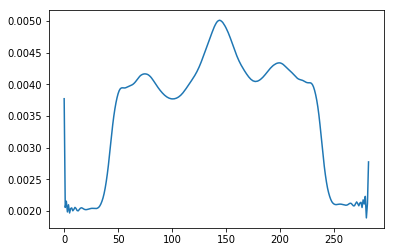

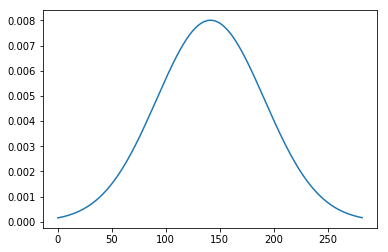

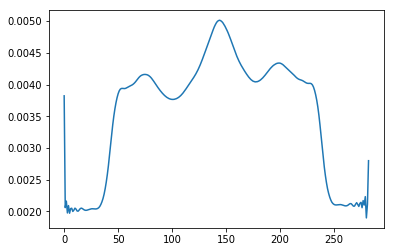

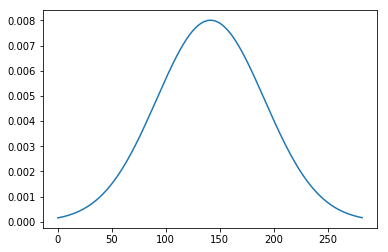

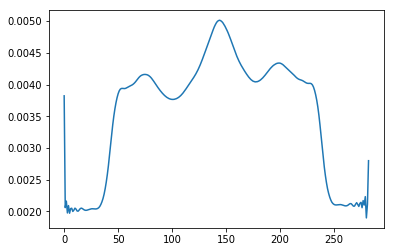

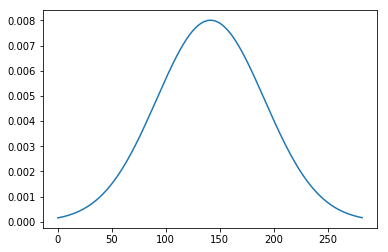

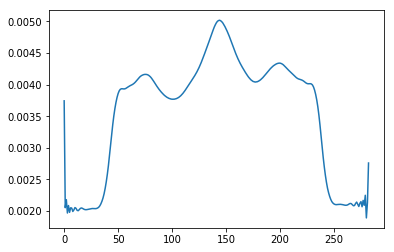

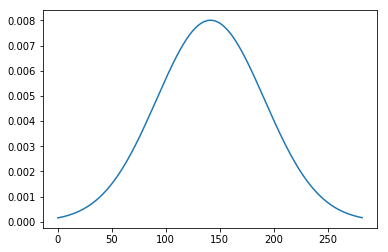

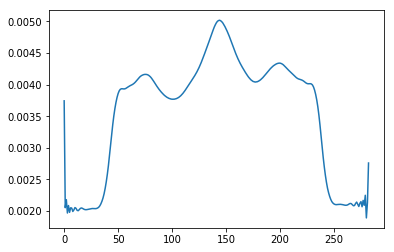

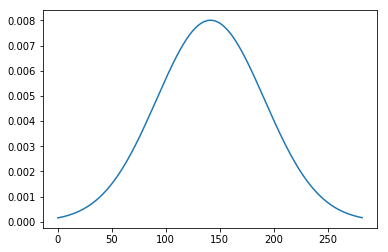

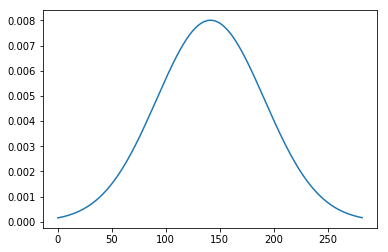

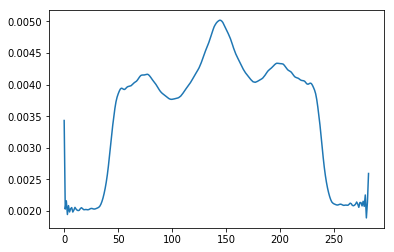

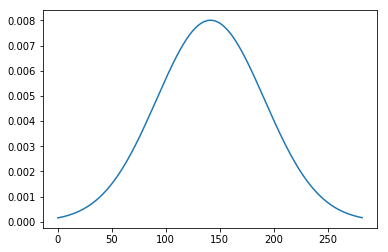

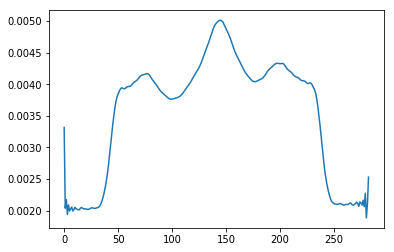

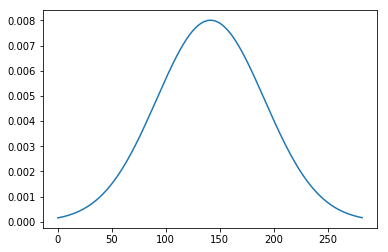

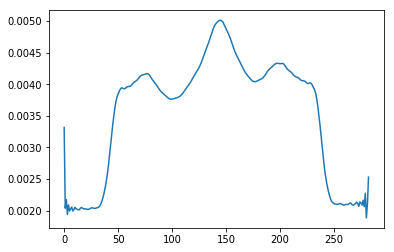

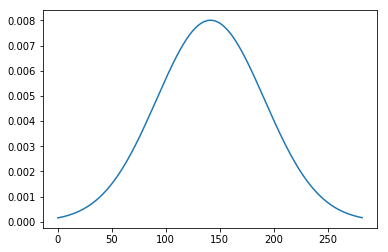

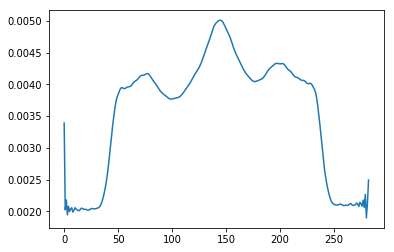

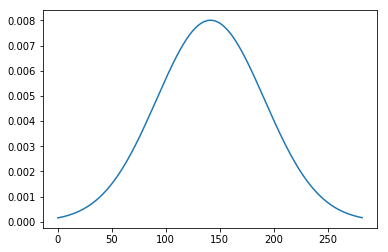

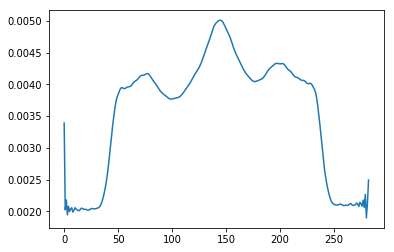

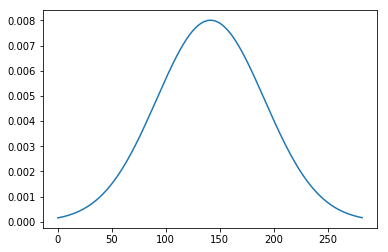

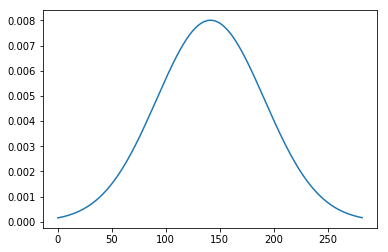

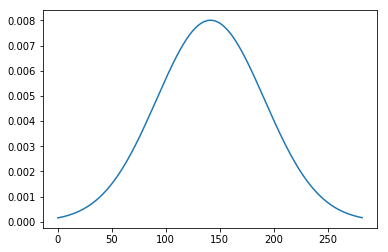

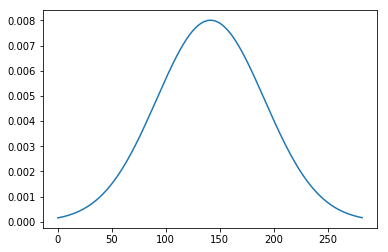

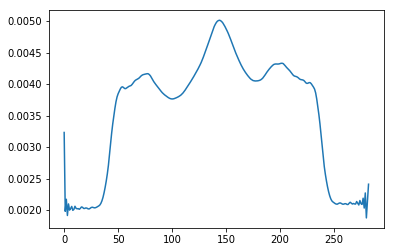

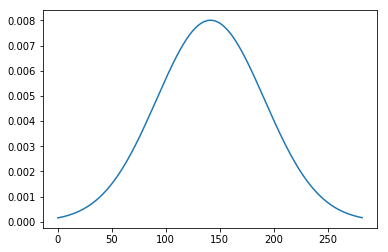

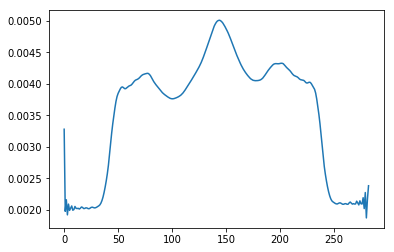

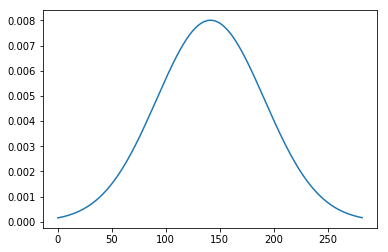

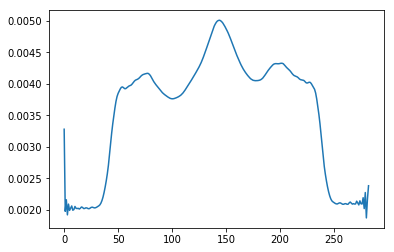

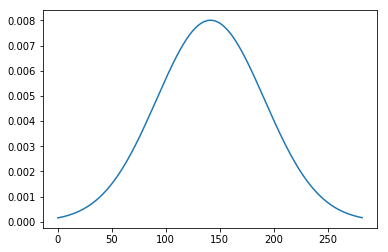

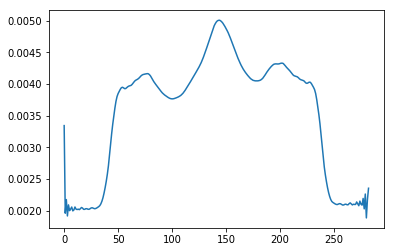

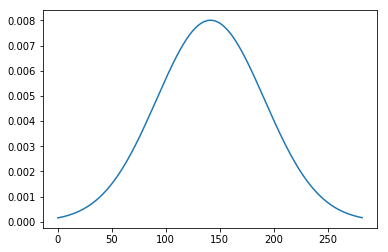

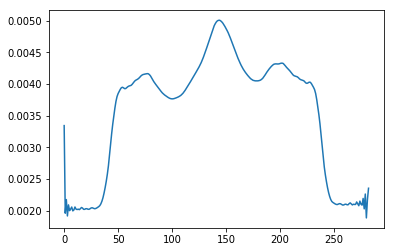

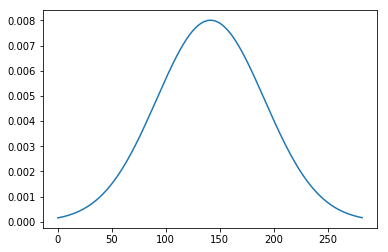

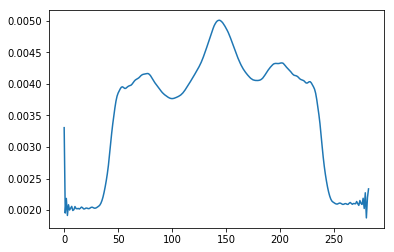

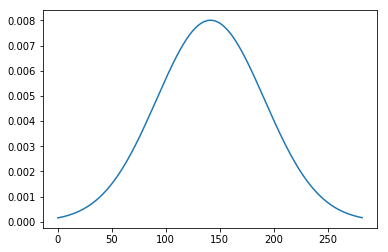

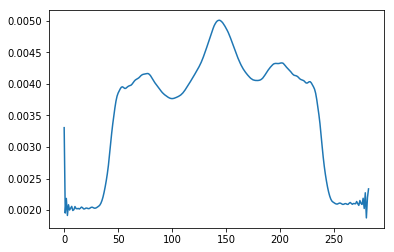

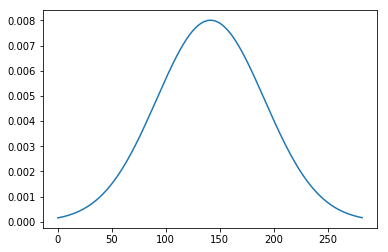

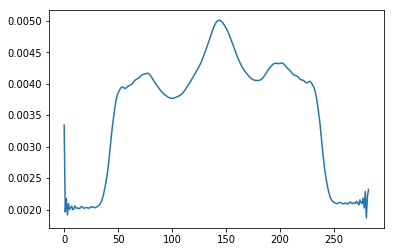

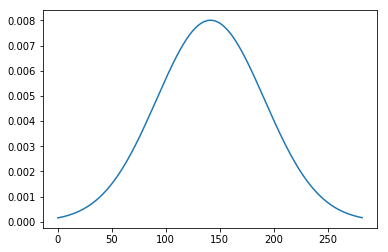

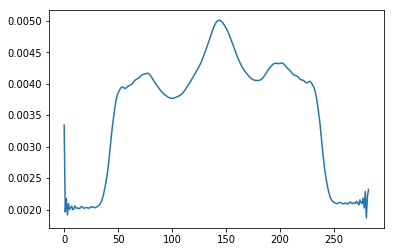

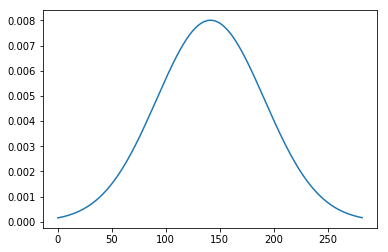

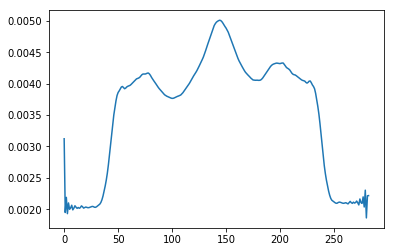

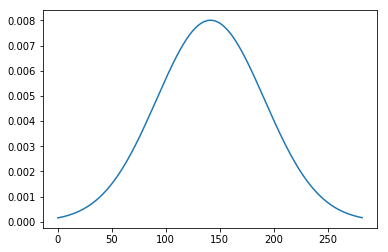

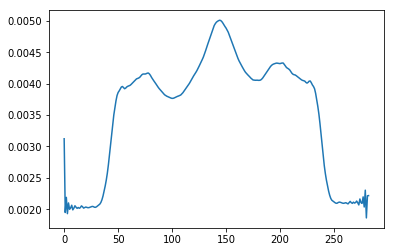

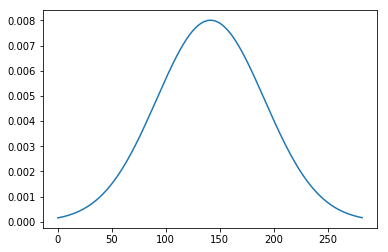

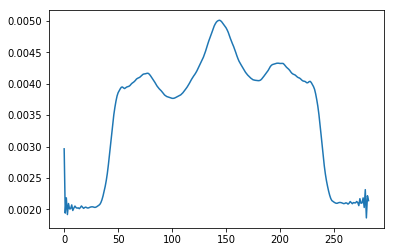

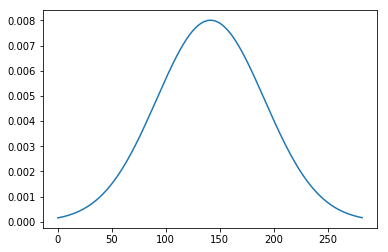

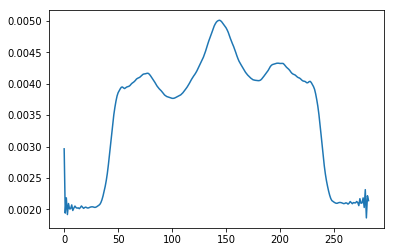

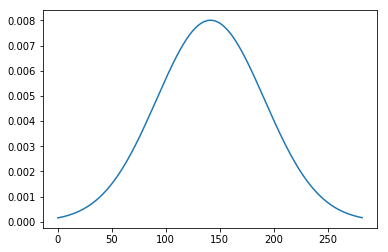

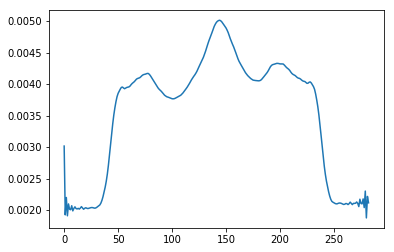

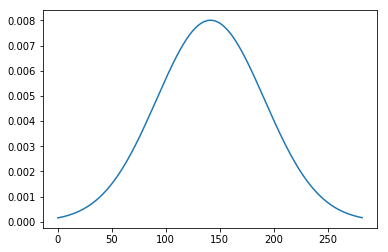

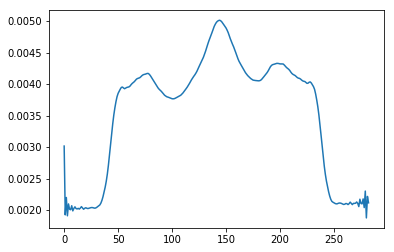

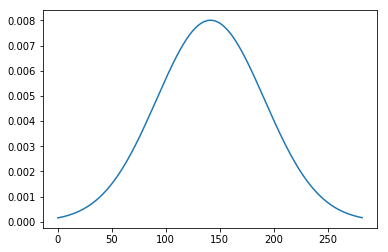

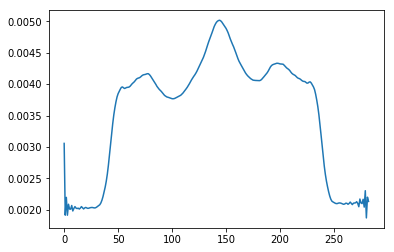

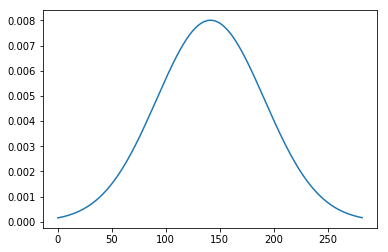

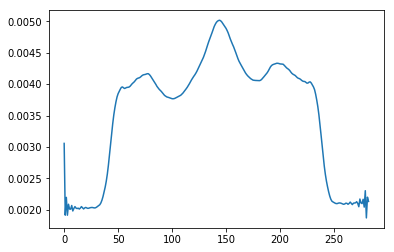

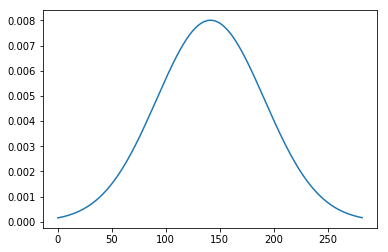

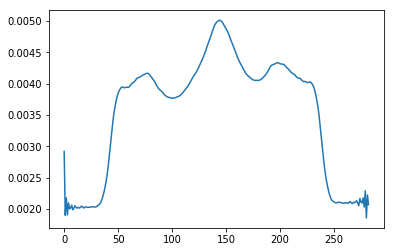

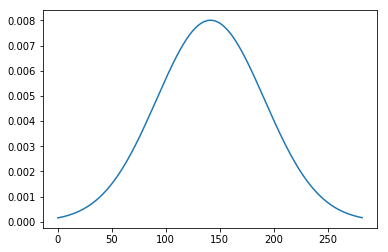

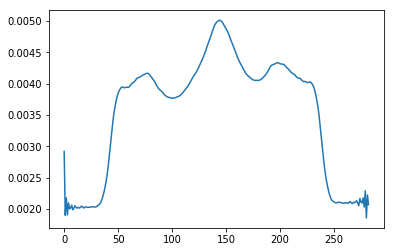

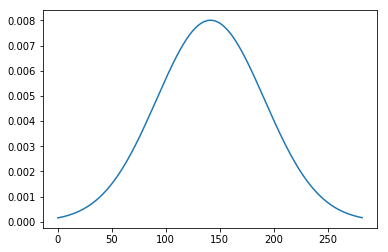

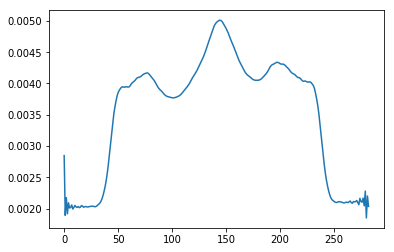

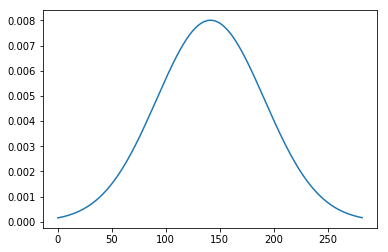

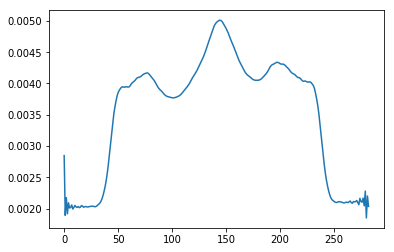

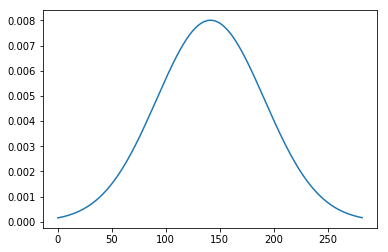

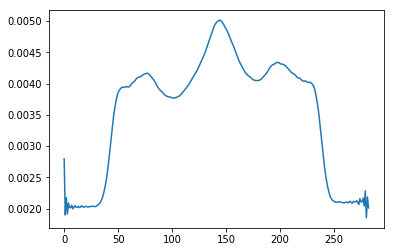

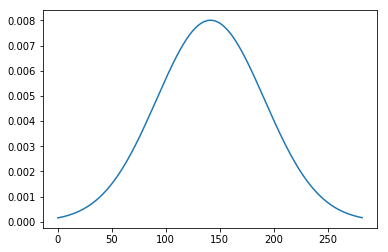

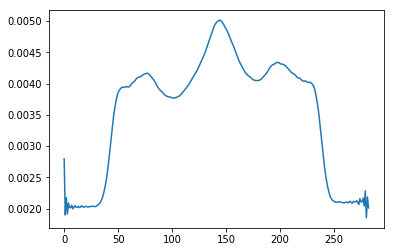

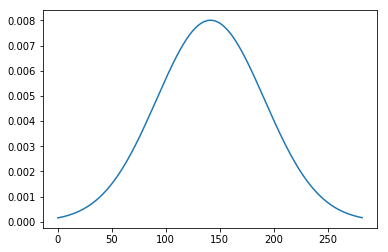

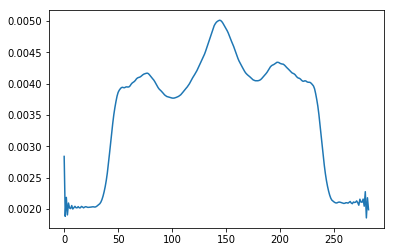

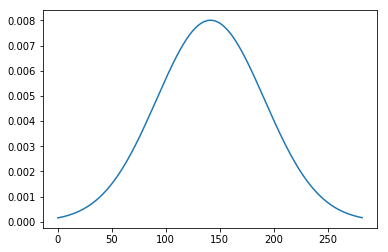

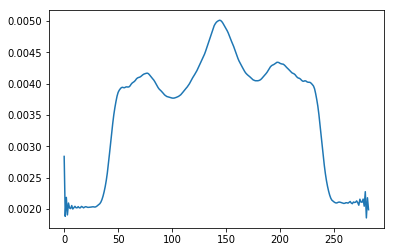

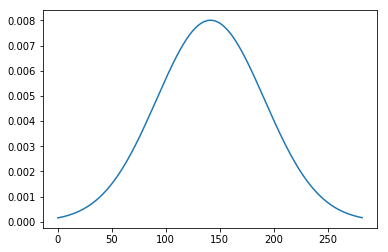

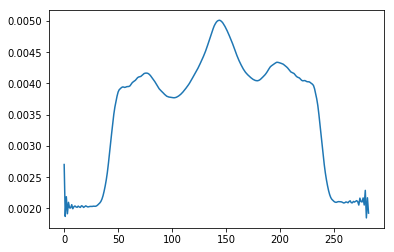

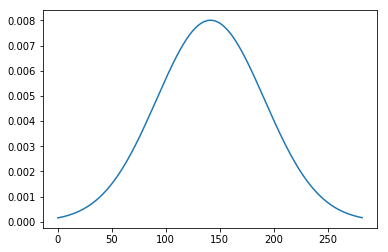

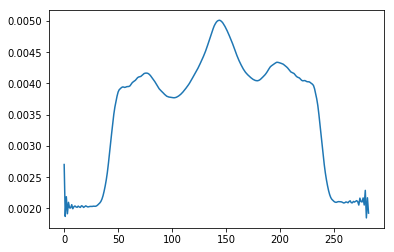

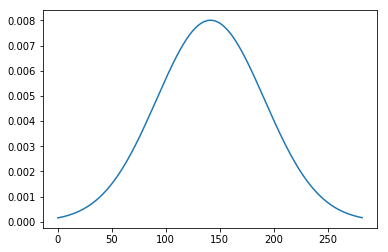

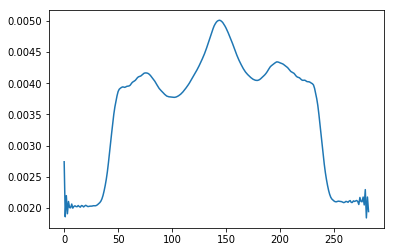

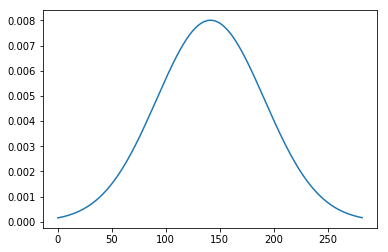

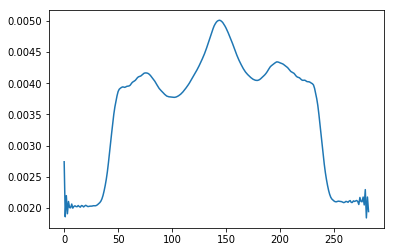

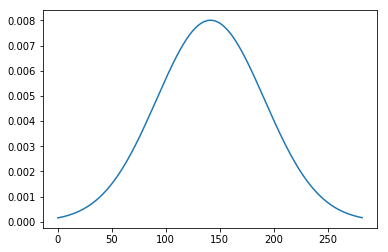

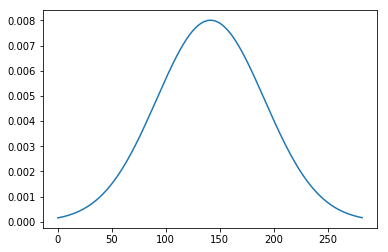

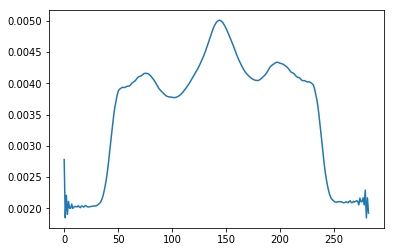

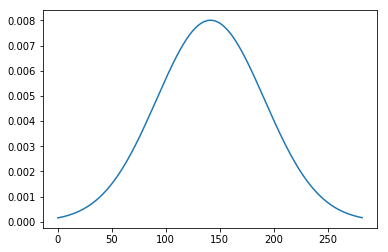

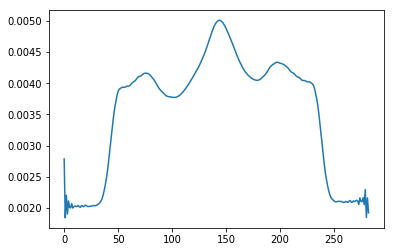

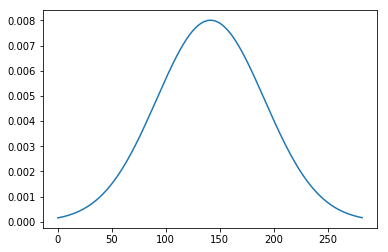

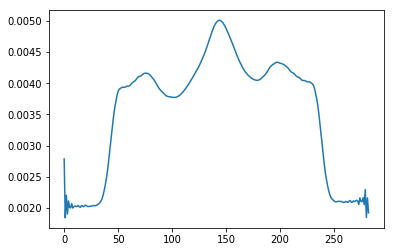

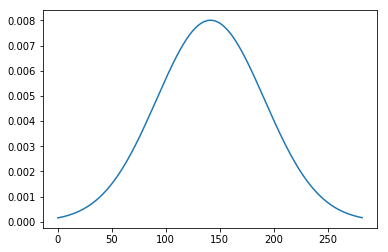

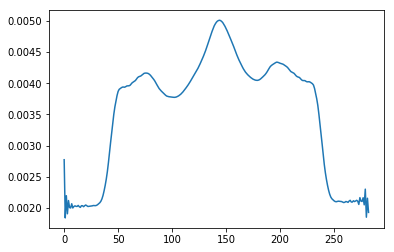

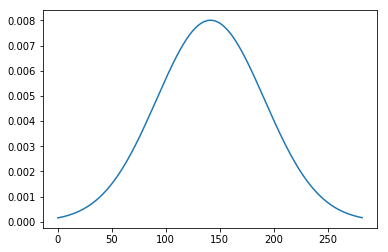

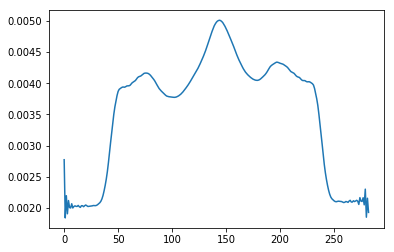

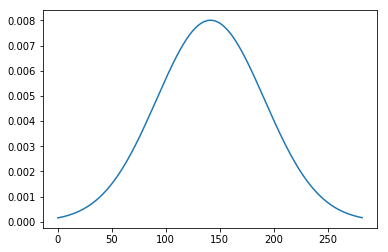

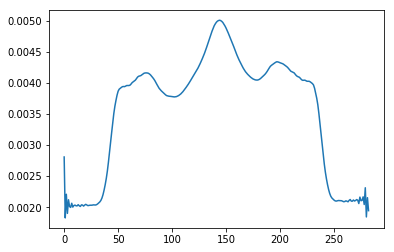

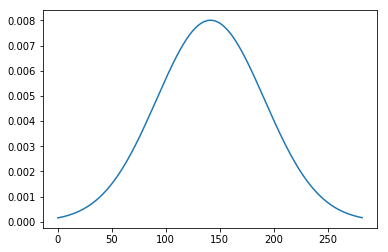

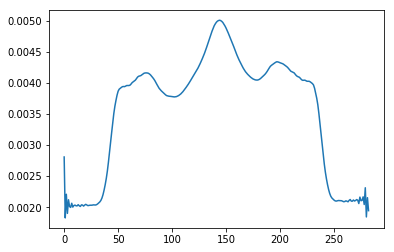

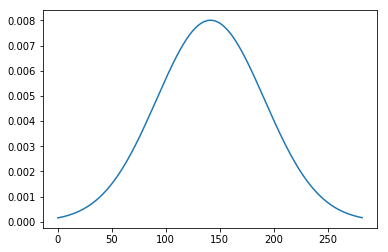

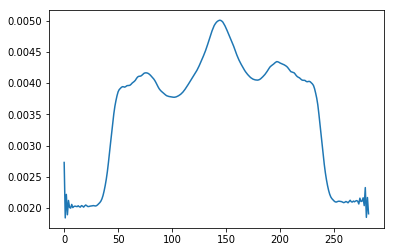

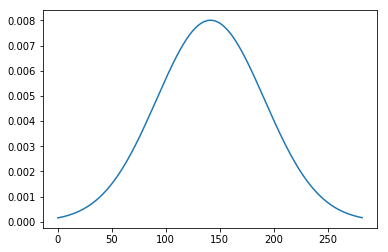

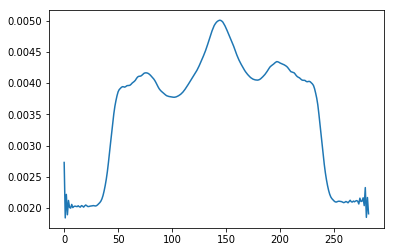

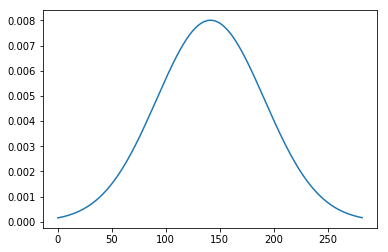

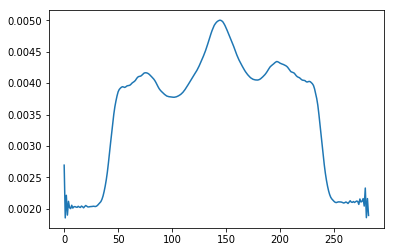

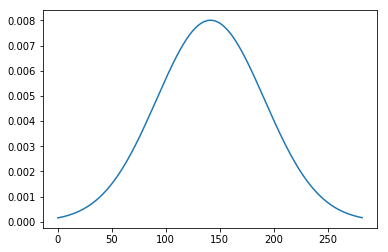

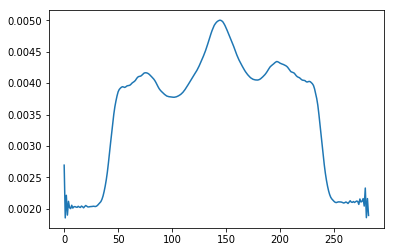

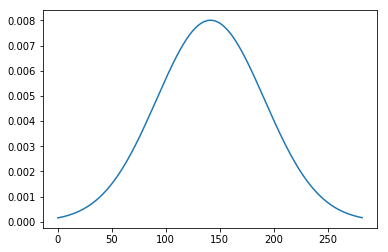

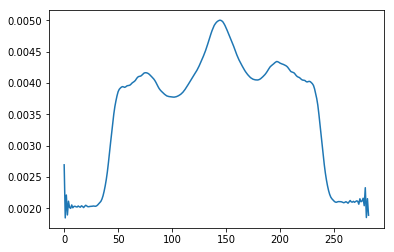

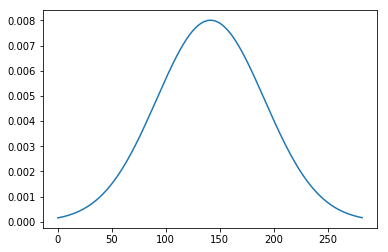

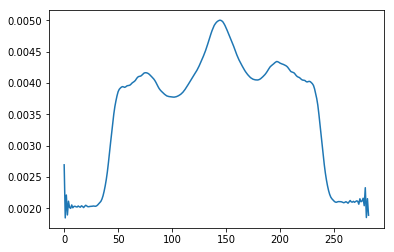

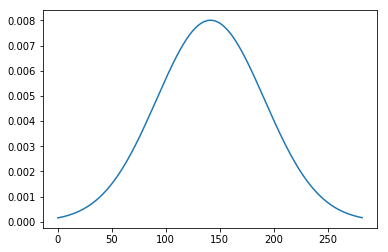

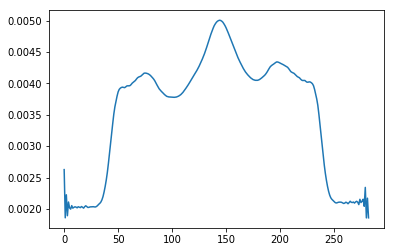

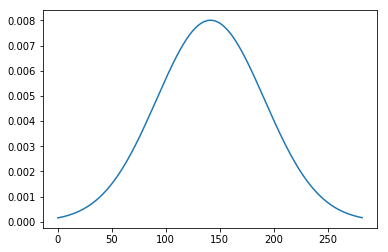

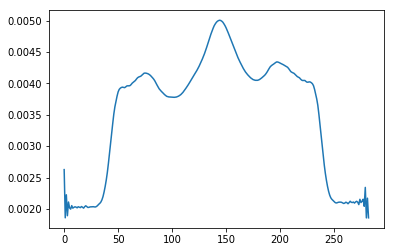

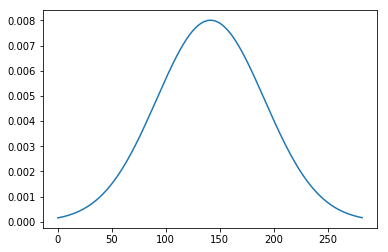

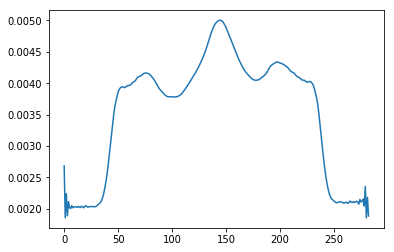

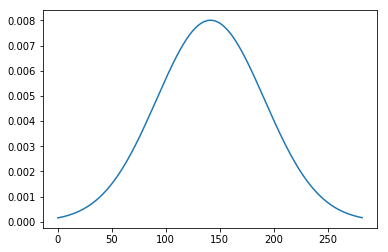

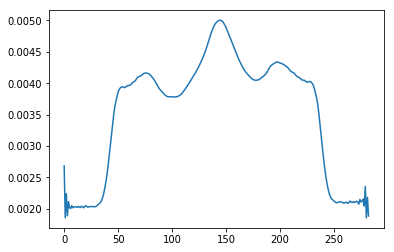

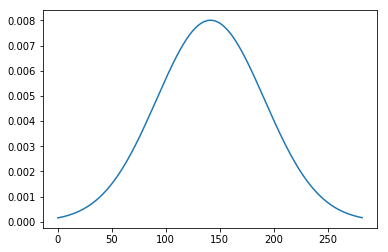

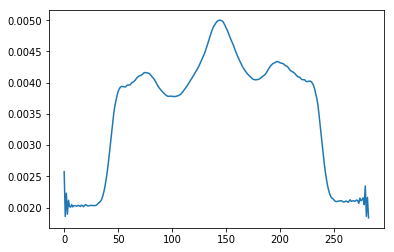

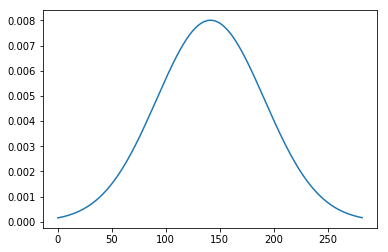

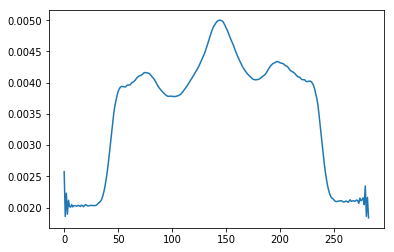

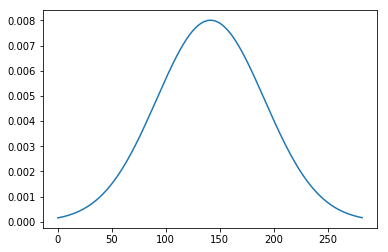

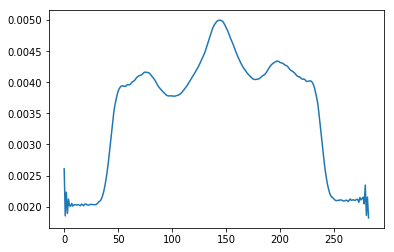

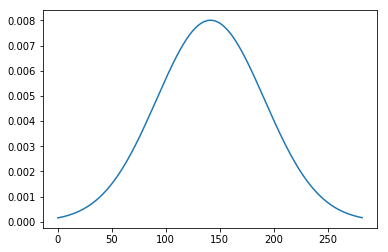

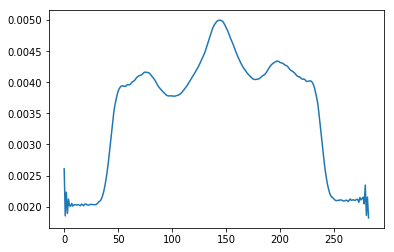

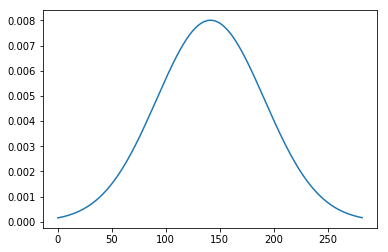

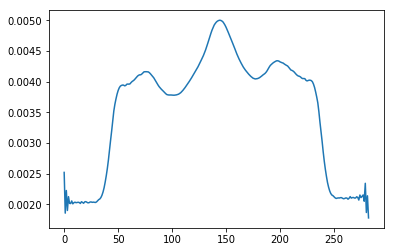

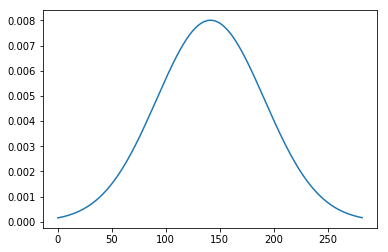

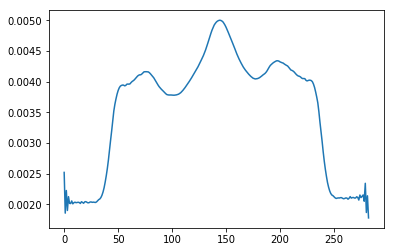

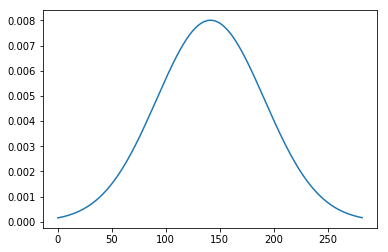

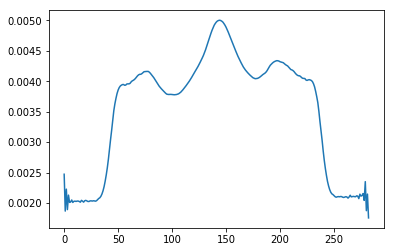

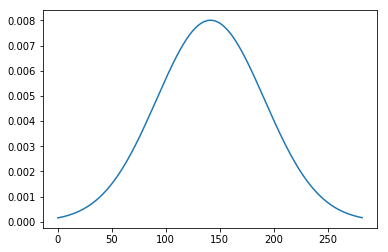

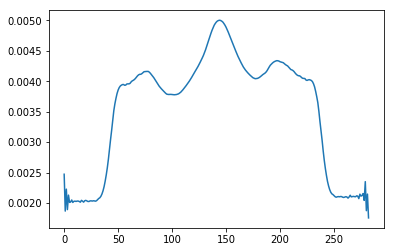

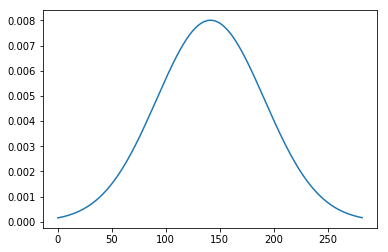

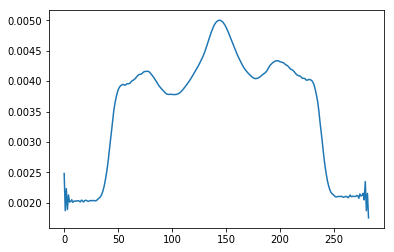

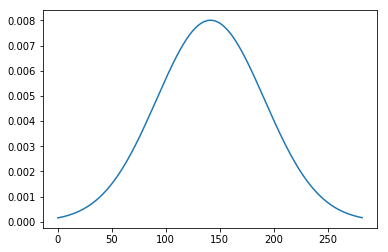

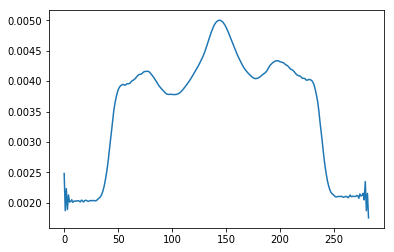

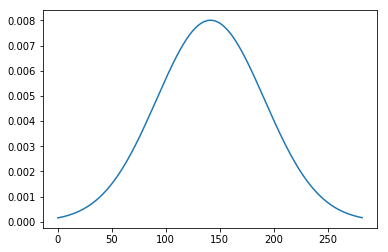

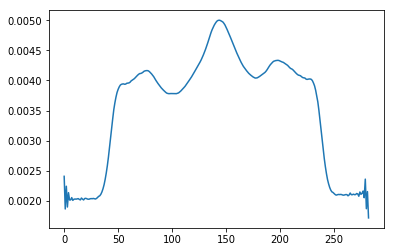

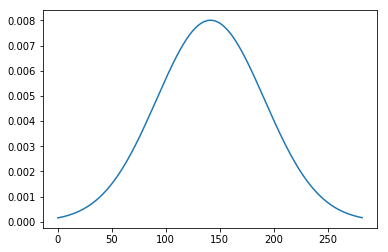

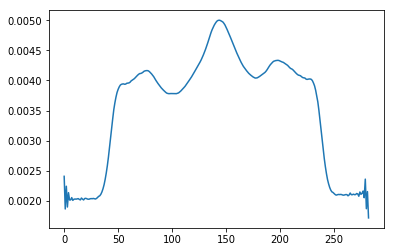

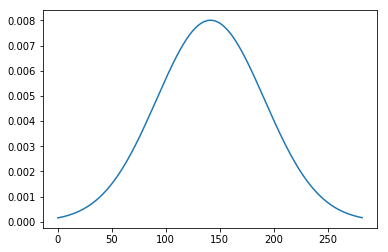

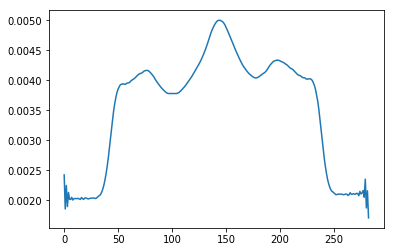

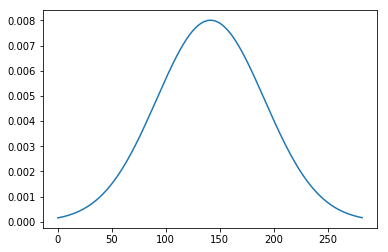

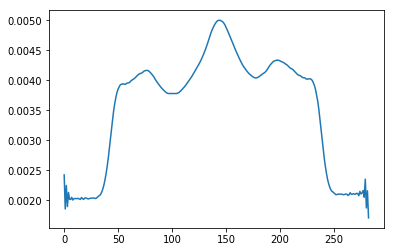

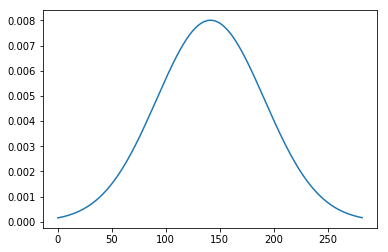

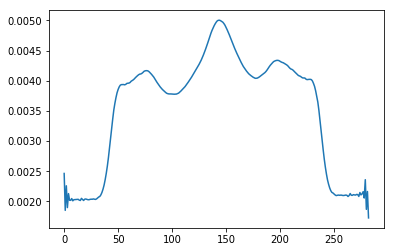

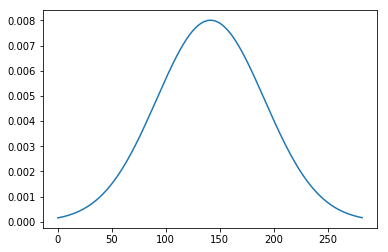

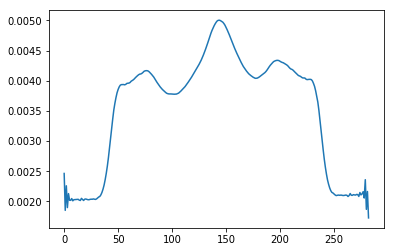

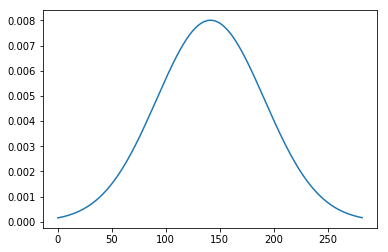

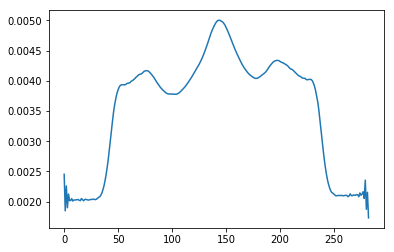

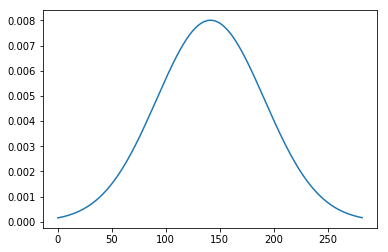

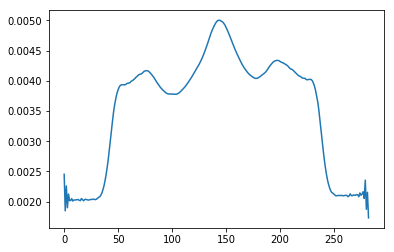

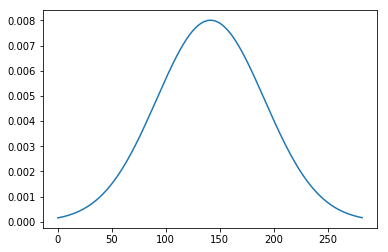

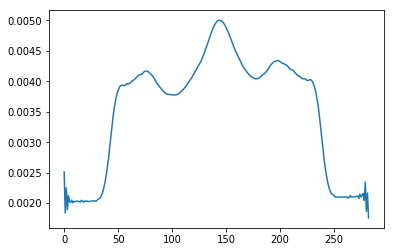

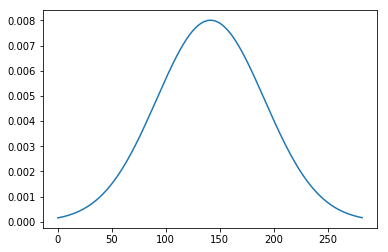

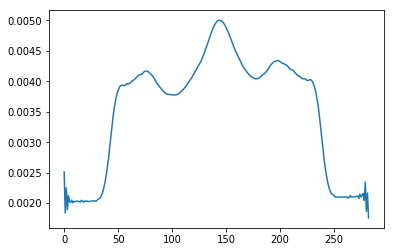

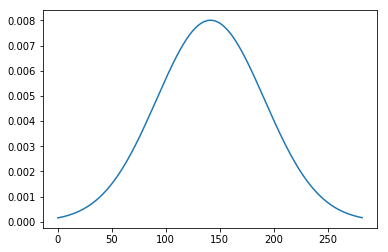

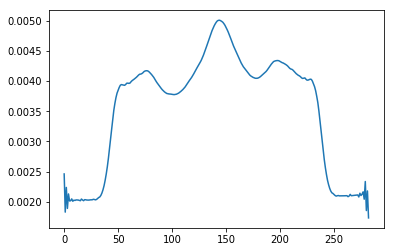

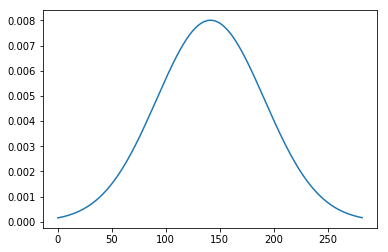

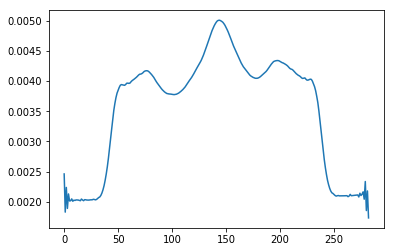

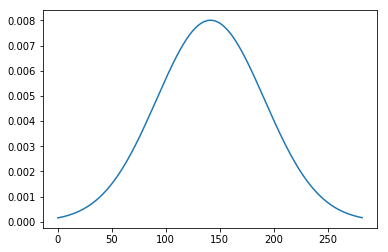

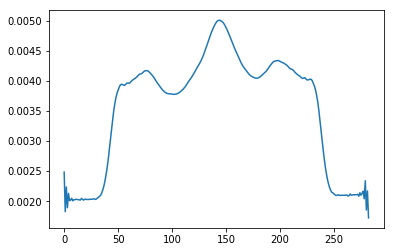

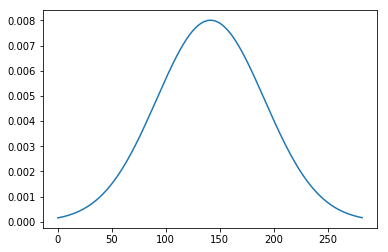

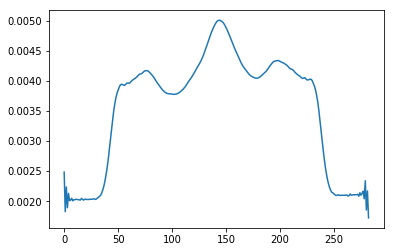

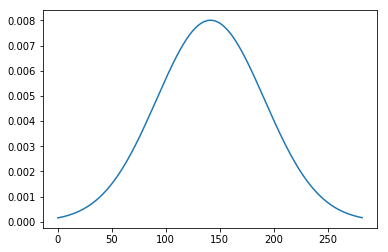

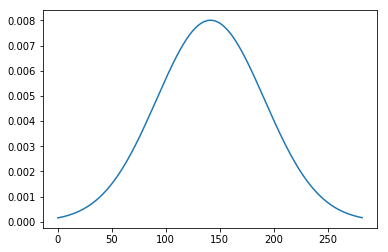

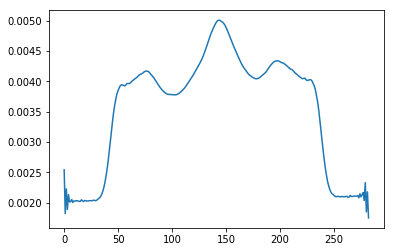

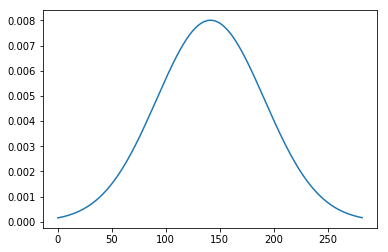

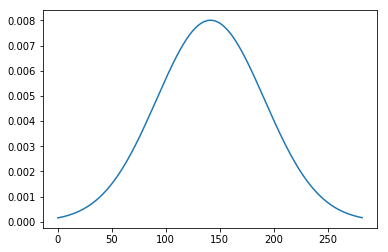

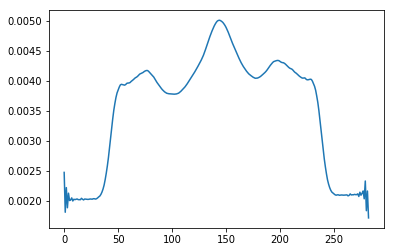

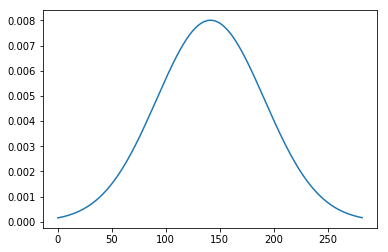

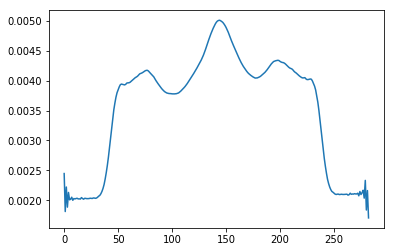

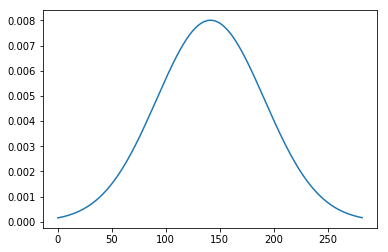

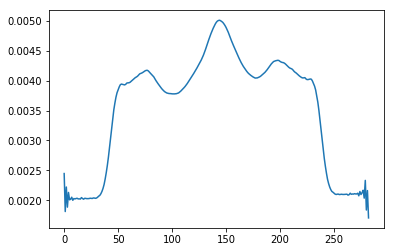

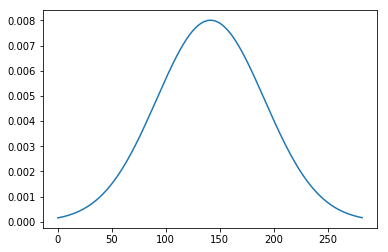

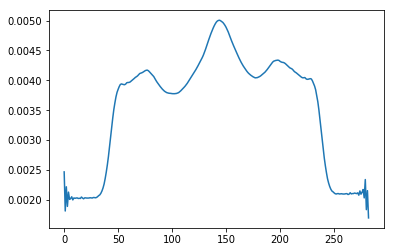

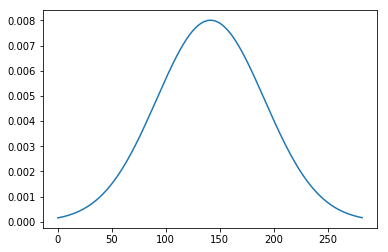

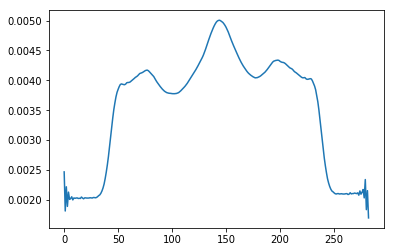

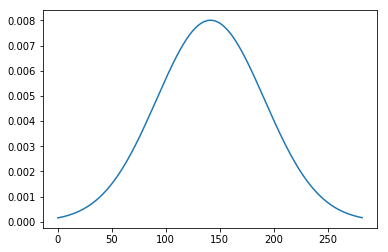

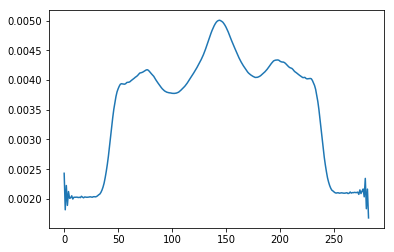

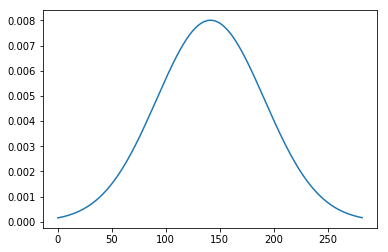

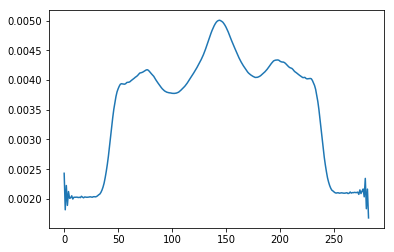

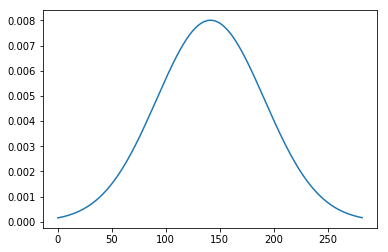

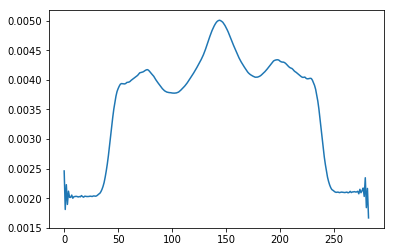

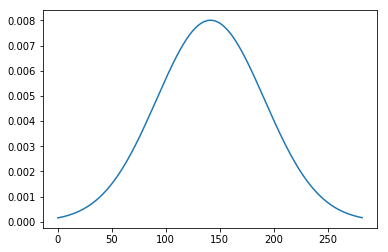

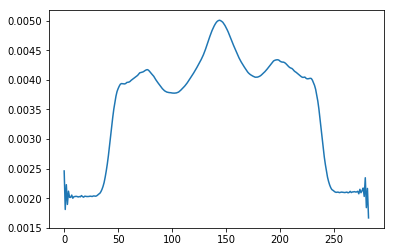

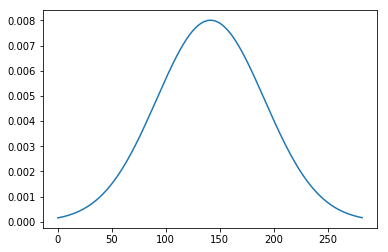

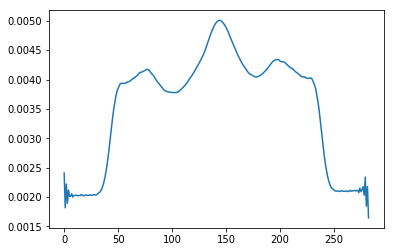

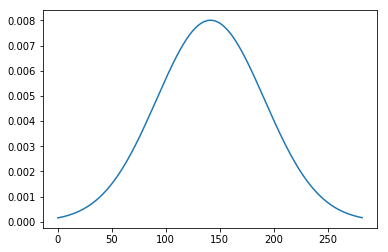

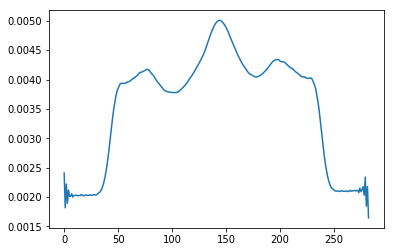

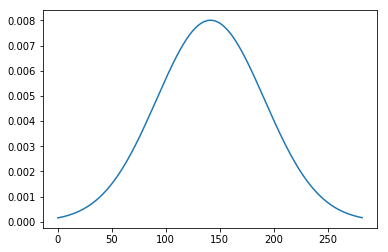

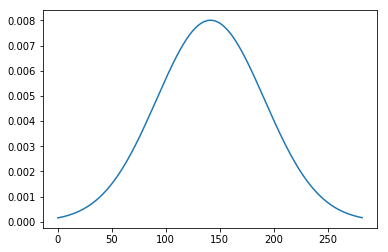

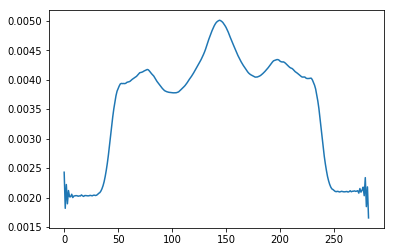

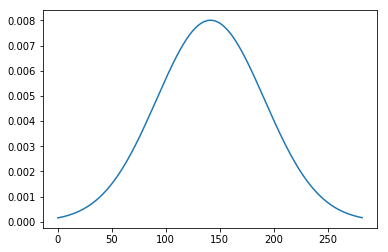

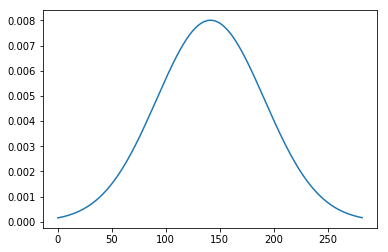

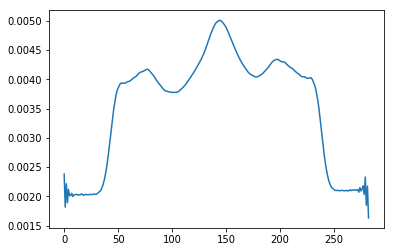

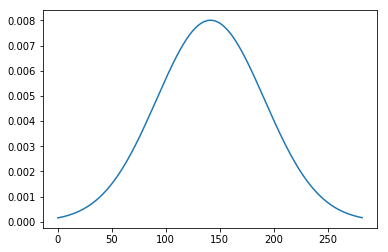

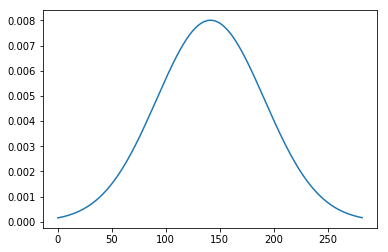

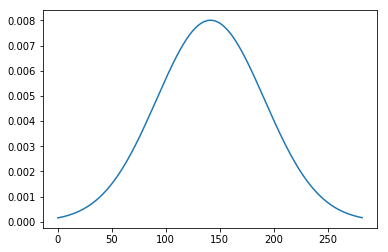

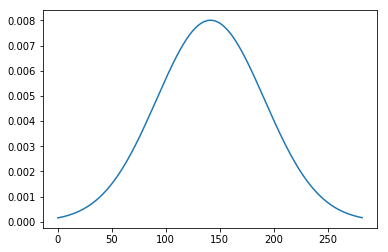

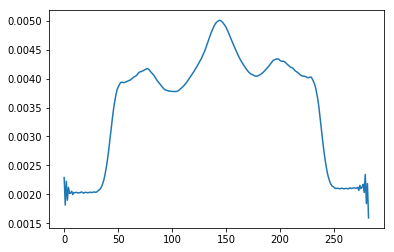

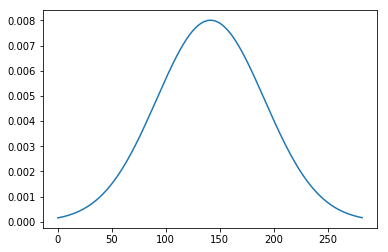

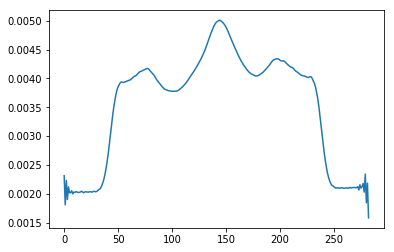

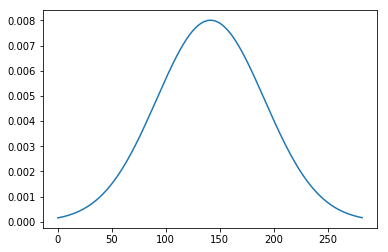

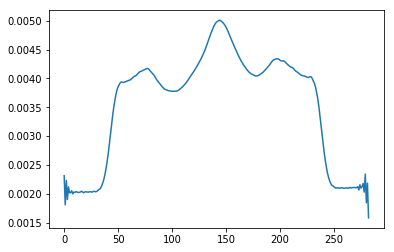

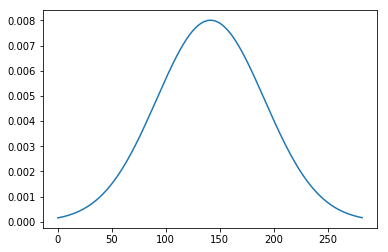

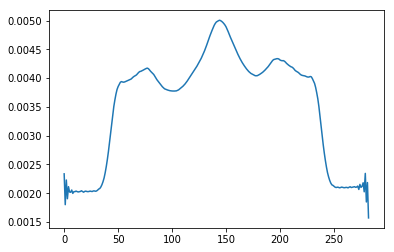

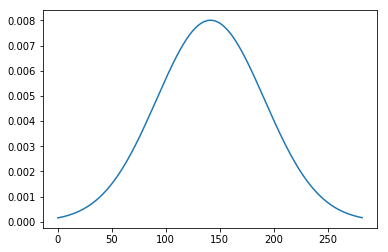

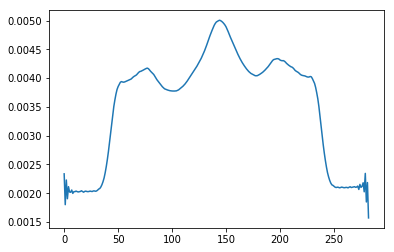

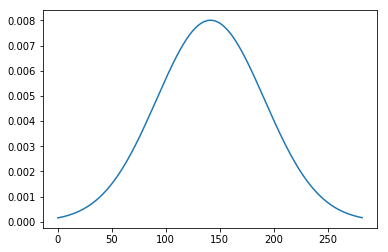

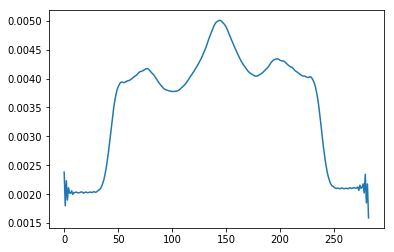

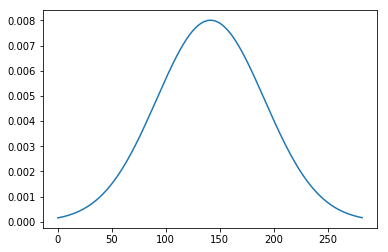

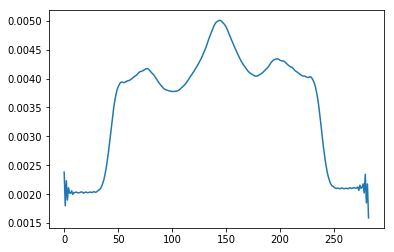

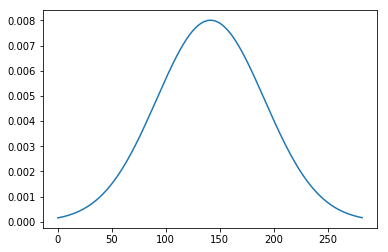

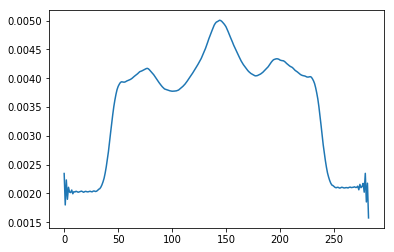

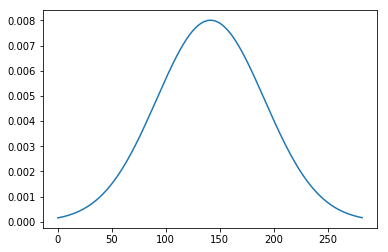

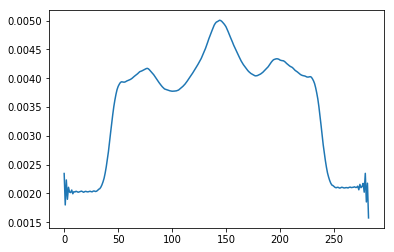

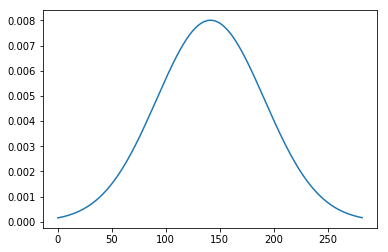

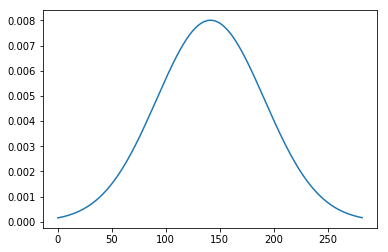

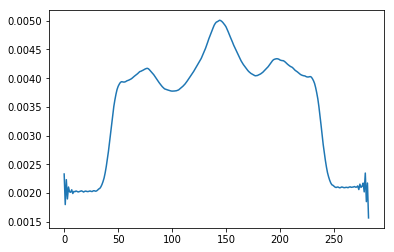

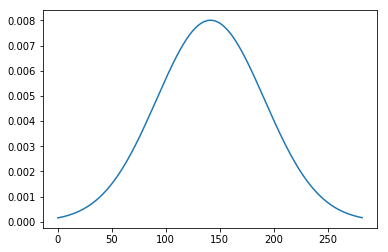

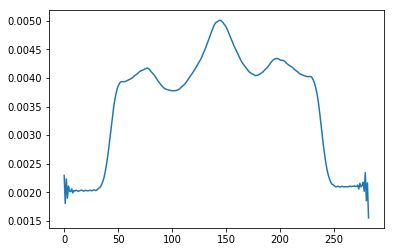

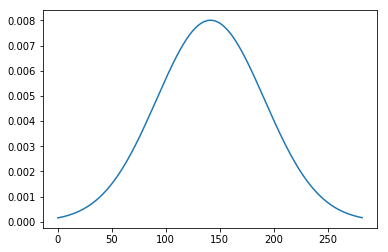

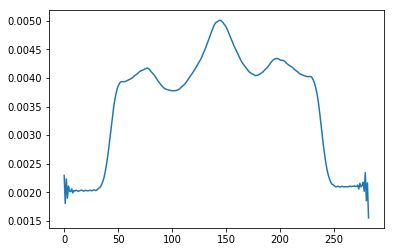

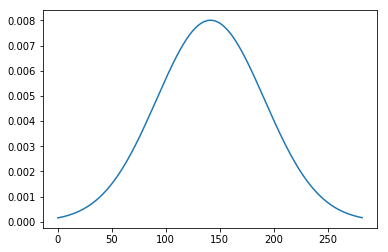

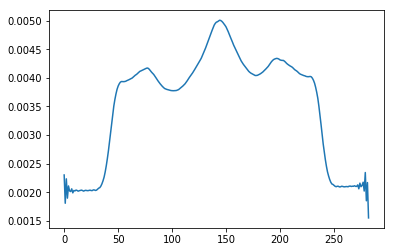

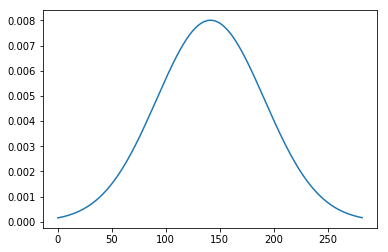

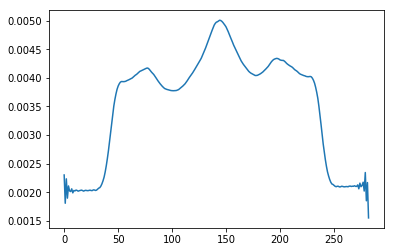

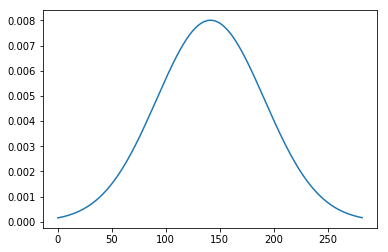

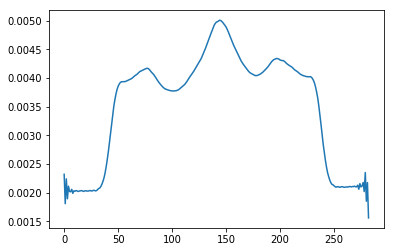

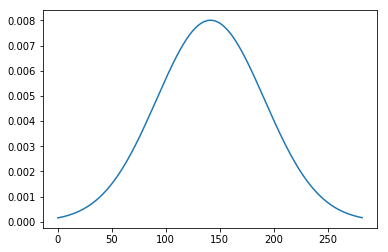

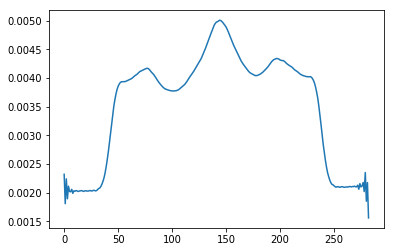

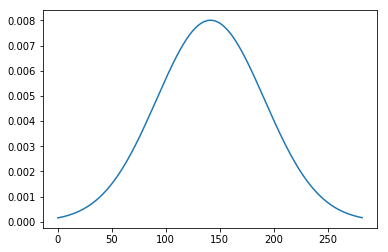

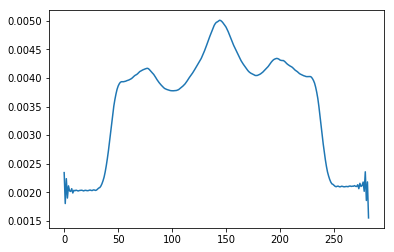

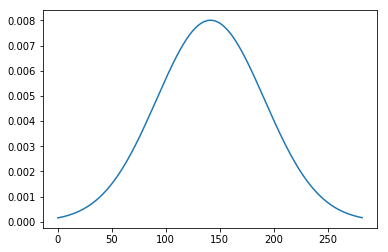

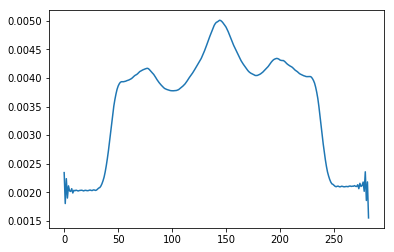

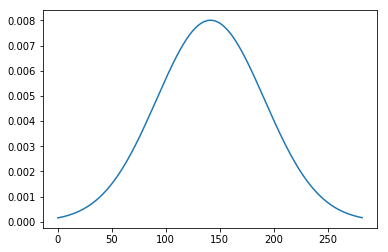

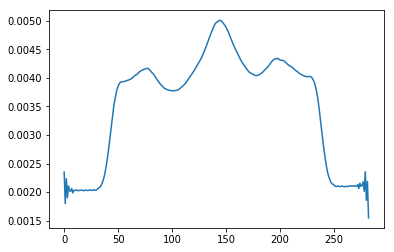

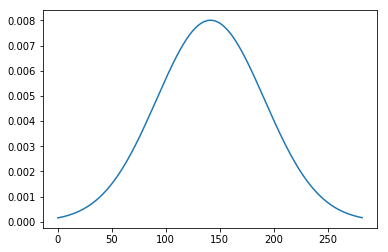

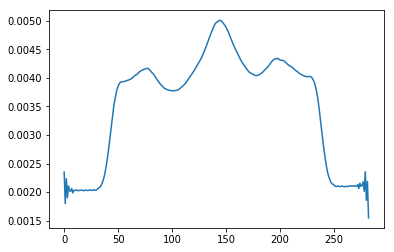

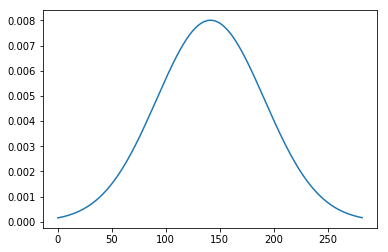

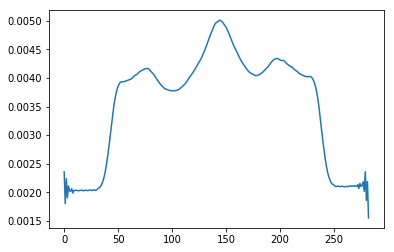

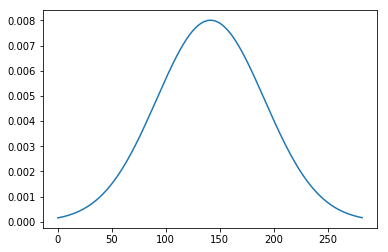

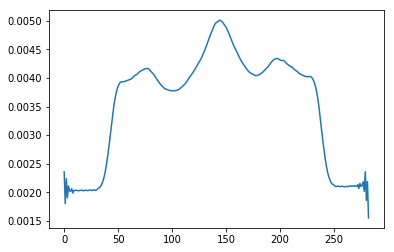

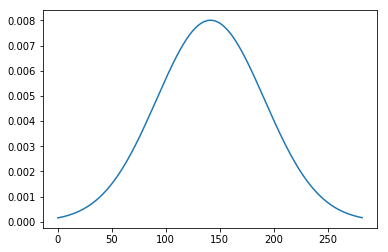

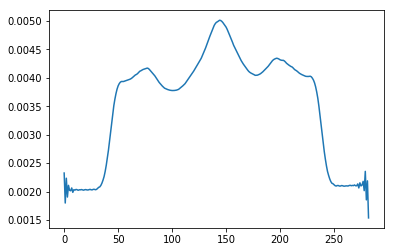

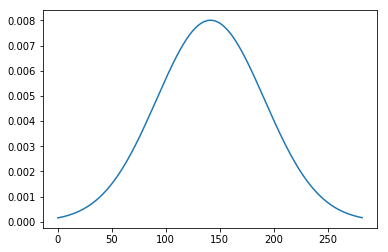

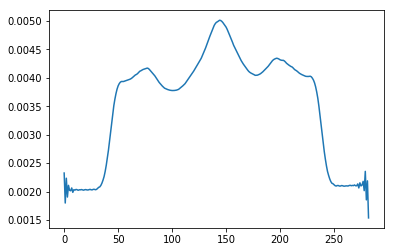

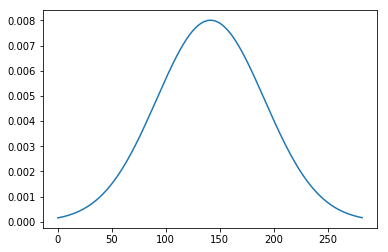

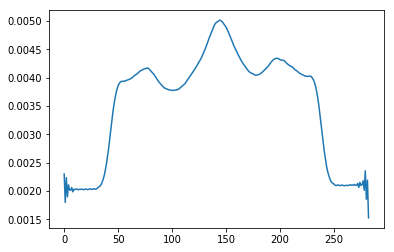

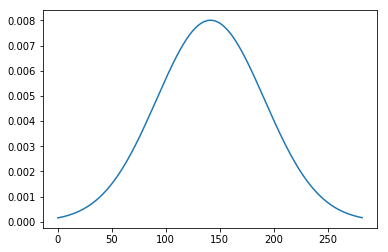

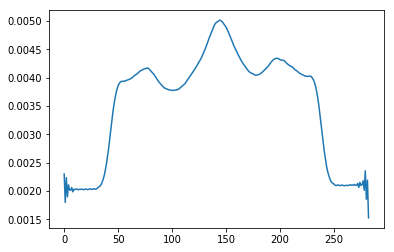

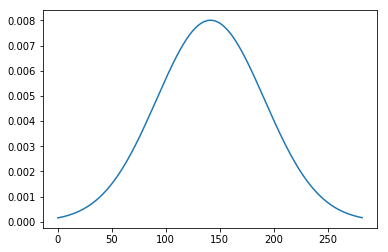

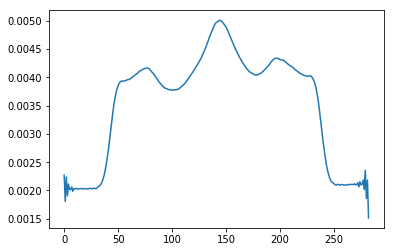

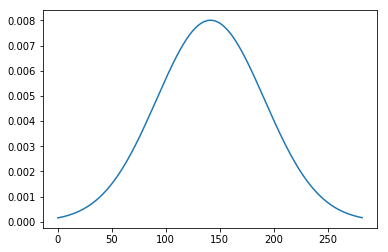

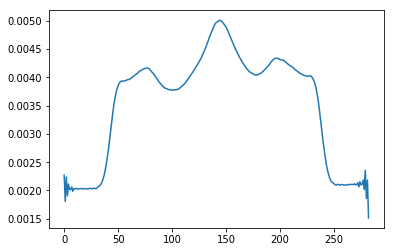

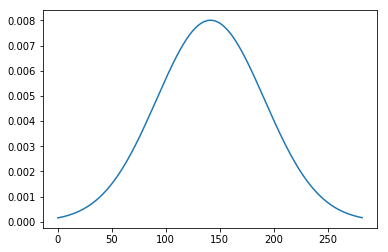

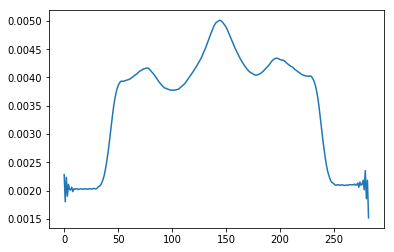

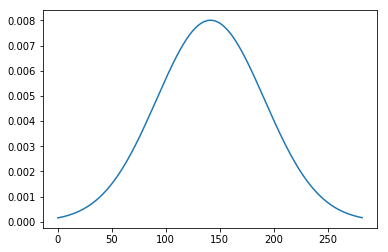

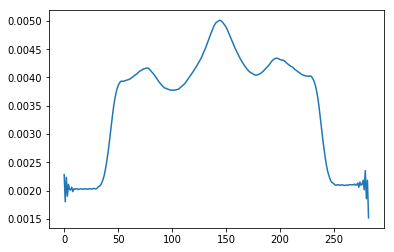

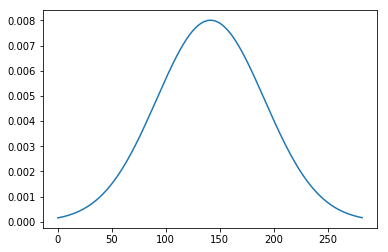

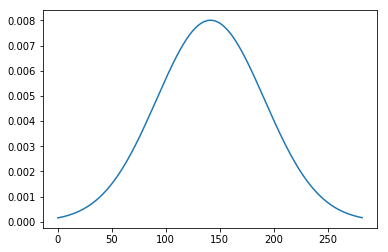

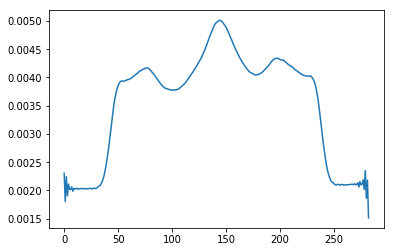

0
4.1372665302092465e-06


In [33]:
MSE_dct = []
MSE_cdt = []

for N in range(1, 113):
    I_recon = dct_recons(I1, N)
    I1_recon = cdt_recons(x0, f1_hat, N)
    I1_hat, I1_recon, f1_hat_recon, I1_recon = cdt_recons(x0, f1_hat, N)
    MSE_dct.append(np.mean((I1-I_recon)**2))
    MSE_cdt.append(np.mean((I1-I1_recon)**2))
print(np.argmax(MSE_cdt))
print(np.max(MSE_cdt))

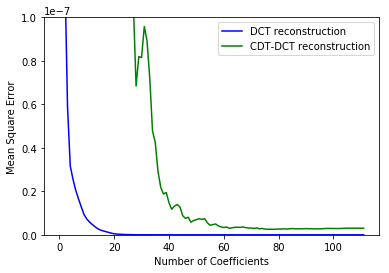

4


In [26]:
plt.Figure(figsize=(4, 3), dpi=200)
plt.plot(MSE_dct, label='DCT reconstruction', color='blue')
plt.plot(MSE_cdt, label='CDT-DCT reconstruction', color='green')
plt.ylim([0, 0.0000001])
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Coefficients')
plt.legend()
plt.savefig('mse.png', dpi=200)
plt.show()
print(np.argmax(MSE_cdt[10:]))

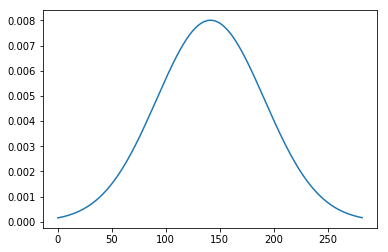

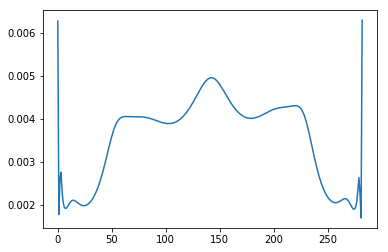

9.369644614613573e-09
1.437028750985304e-07


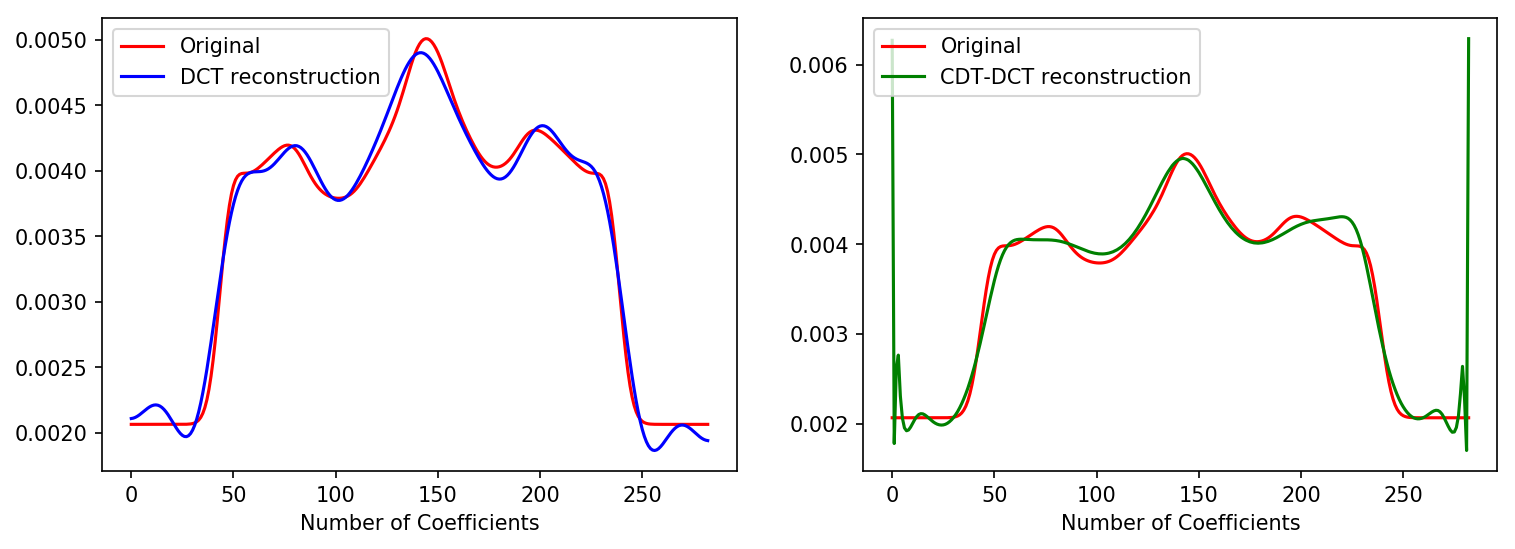

In [27]:
N = 10
print()
I_recon = dct_recons(I1, N)
# I1_recon = cdt_recons(x0, f1_hat, N)
I1_hat, I1_recon, f1_hat_recon, I1_recon = cdt_recons(x0, f1_hat, N)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=150)
axes[0].plot(I1, color='r', label='Original')
axes[1].plot(I1, color='r', label='Original')

axes[0].plot(I_recon, color='b', label='DCT reconstruction')
axes[1].plot(I1_recon, color='g', label='CDT-DCT reconstruction')
axes[0].set_xlabel('Number of Coefficients')
# axes[0].set_ylim([0, 0.01])
# axes[1].set_ylim([0, 0.01])
axes[1].set_xlabel('Number of Coefficients')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
print(((I_recon-I1)**2).mean())
print(((I1_recon-I1)**2).mean())
plt.savefig('compare.png', dpi=200)

In [28]:
# copied from https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html#discrete-cosine-transforms
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

def dct_recons(x, num_coefficents):
    N = len(x)
    t = np.linspace(0, 1, N)
    y = dct(x, norm='ortho')
    th = np.sort(np.abs(y))[::-1][num_coefficents-1]
    y[np.abs(y)<th] = 0
#     window = np.zeros(N)
#     window[:num_coefficents] = 1
    yr = idct(y, norm='ortho')
    return yr

plt.plot(I1, '-', label='Original')
plt.plot(dct_recons(I1, 3), '-', label='Reconstruction using 10 coefficients')
plt.legend()